## Myers-Briggs Type Indicator® (MBTI®) Personality Type Prediction

<p><span style="color: Blue; font-family: Babas; font-size: 1.3em;"> We will predict the personality type of people from their social media posts.

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axes:

`Introversion (I) – Extroversion (E)`

`Intuition (N) – Sensing (S)`

`Thinking (T) – Feeling (F)`

`Judging (J) – Perceiving (P)`

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> So for example, someone who prefers __Introversion__, __Intuition__, __Thinking__ and __Perceiving__ would be labelled an `INTP` in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.


## Importing Libaries

In [139]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors


## NLP
import contractions
import inflect
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [140]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('white')

## Visualization Settings

In [141]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [142]:
## Reading file
df = pd.read_csv('mbti_1.csv')

In [143]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you

Our dataset has __2 columns__. While the first one contains __the personality type__, on the other hand second column contains __the post__ belongs to person whose personality type is alreday given in type column. 

In [144]:
## We have 8675 observations in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [145]:
df.shape

(8675, 2)

## Sample List of Posts

In [146]:
## This shows a sample post belongs to a person.
[p.split('|||') for p in df.head(1).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

### The number of users is __8675__

## Mapping Personalities

In [147]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [148]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

As seen from the above figures, __the most common personality type is `INTP`__. First four most common ones are `Introversion` type of personalities. 

### Let's check our data through some exploratory data analysis. 

## EDA

<Figure size 432x288 with 0 Axes>

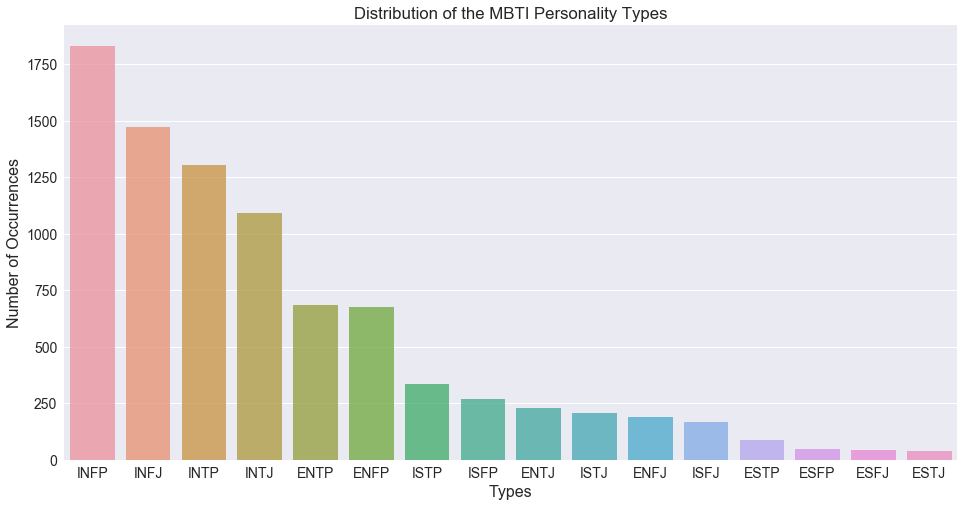

In [149]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
#plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. At the same time least common four types are __Extroversion__.This is __`unbalanced`__ data as we can understand from the graphic.

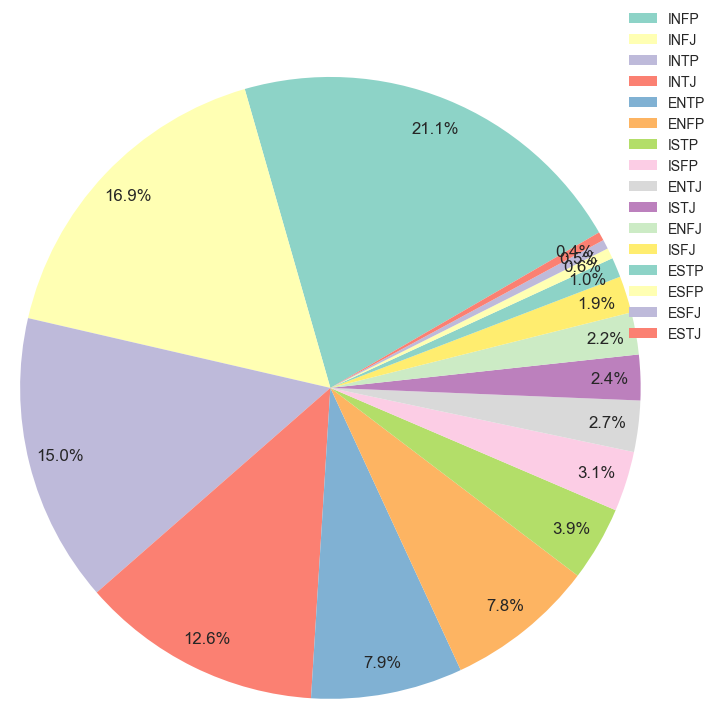

In [150]:
# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

Let's see the personality types characteristics explicitly.

In [151]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [152]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

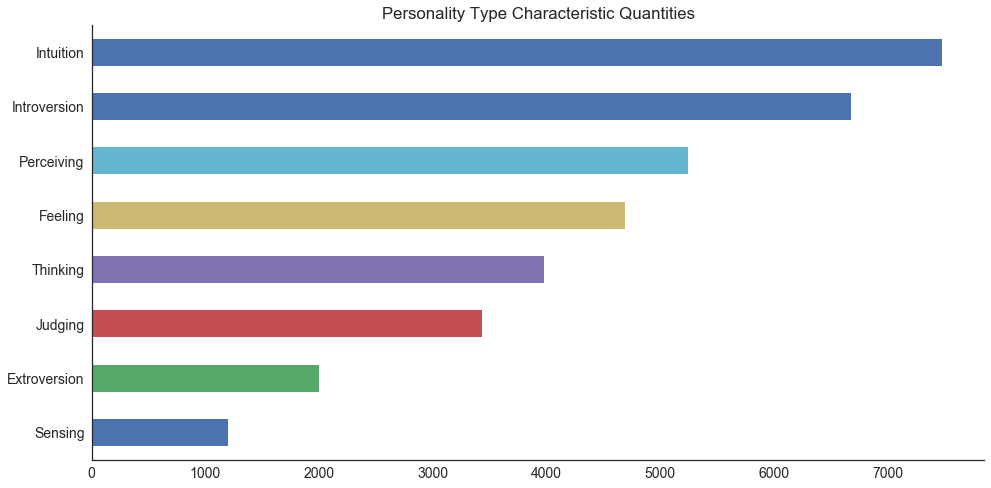

In [153]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh().set_title('Personality Type Characteristic Quantities')
sns.despine()
plt.show()

As we see from the bar graphic the most common personality type is the people with `Intuition` and the least one is `Sensing`. We conclude that people are tend to be more Intuitative compared to Sensing.

In [154]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [155]:
def get_types(person):
    
    """This function classify personality types in binary such as while Introversion gets 1, Extroversion gets 0 so on"""
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': # Introversion = 1
        I = 1
    elif selected_type[0] == 'E': # Extroversion = 0
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': # Intuition = 1
        N = 1
    elif selected_type[1] == 'S': # Sensing = 0
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': # Thinking = 1
        T = 1
    elif selected_type[2] == 'F': # Feeling = 0
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': # Judging = 1
        J = 1
    elif selected_type[3] == 'P': # Perceiving = 0
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE': I, 'NS': N , 'TF': T, 'JP': J }) 

In [156]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [157]:
## We can see the posts, each post length and binary classified personality types
df= data
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know y

## Personality Type Quantities in Binary Comprassion

In [158]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[1], " - ", df['IE'].value_counts()[0])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[1], " - ", df['NS'].value_counts()[0])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[1], " - ", df['TF'].value_counts()[0])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[1], " - ", df['JP'].value_counts()[0])

Introversion (I) - Extroversion (E):	 6676  -  1999
Intuition    (N) – Sensing      (S):	 7478  -  1197
Thinking     (T) – Feeling      (F):	 3981  -  4694
Judging      (J) – Perceiving   (P):	 3434  -  5241


The first column shows `Introversion`, `Intuition`, `Thinking` and `Judging` respectively from top to bottom and second column is for `Extroversion`, `Sensing`, `Feeling` and `Perceiving`. As we can see from the numbers above, __the most common characteristic of people in this dataset is being Intuition and then being Introversion.__ Let's visualize this by a graphic.

<Figure size 432x288 with 0 Axes>

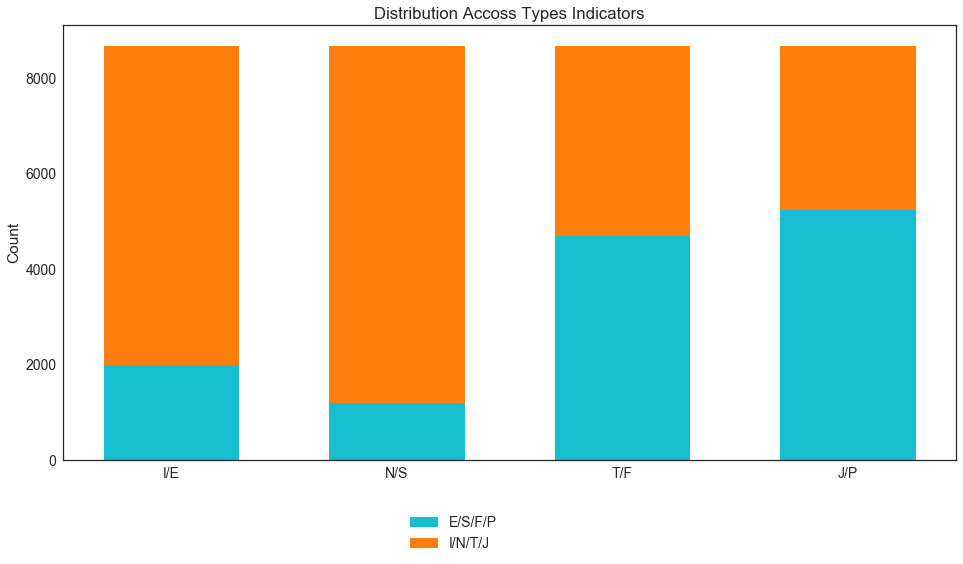

In [159]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('E/S/F/P', 'I/N/T/J'), loc=1, bbox_to_anchor=(0.5,-0.1))
plt.show()

### Thinking vs Feeling and Judging vs Preceiving types are more evenly distributed.

### Let's explore what type of personalties are more inclined to write more. 

In [160]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

<Figure size 432x288 with 0 Axes>

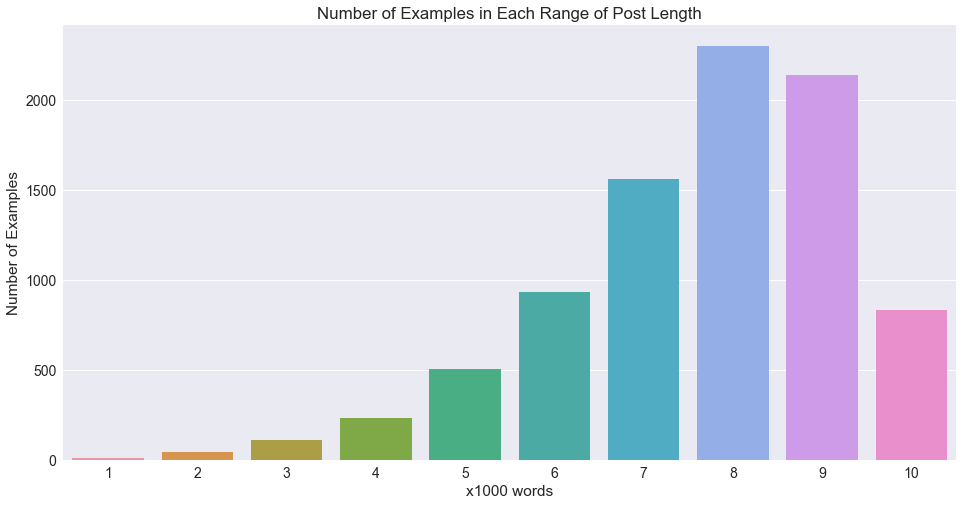

In [161]:
visualization_settings()

ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()

sns.barplot(cnt.index, cnt.values)
sns.set_style('white')

plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

plt.show()
sns.despine()

<Figure size 432x288 with 0 Axes>

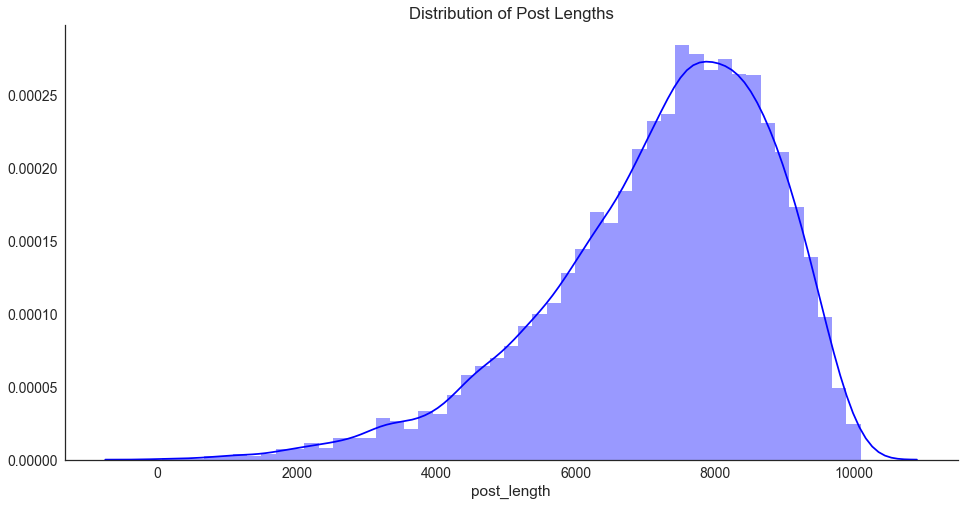

In [209]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='blue').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts). Post length distribution seems normal distributed.

<Figure size 432x288 with 0 Axes>

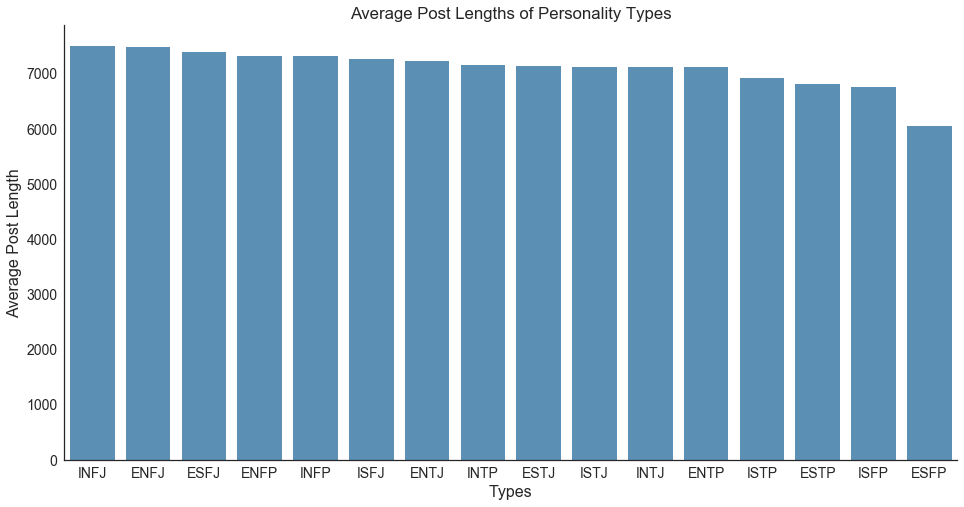

In [217]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[0])
                                                                        

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__. Avarage posts are __above 6000 chars__. INTJ type has the maximum avarage post lenth. We can conclude that `ESFP` type people tend to write shortly while `INFJ` personality type have a tendency of writing longer.

In [164]:
## words_per_comment shows how many words there appears in each comment on the blog for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

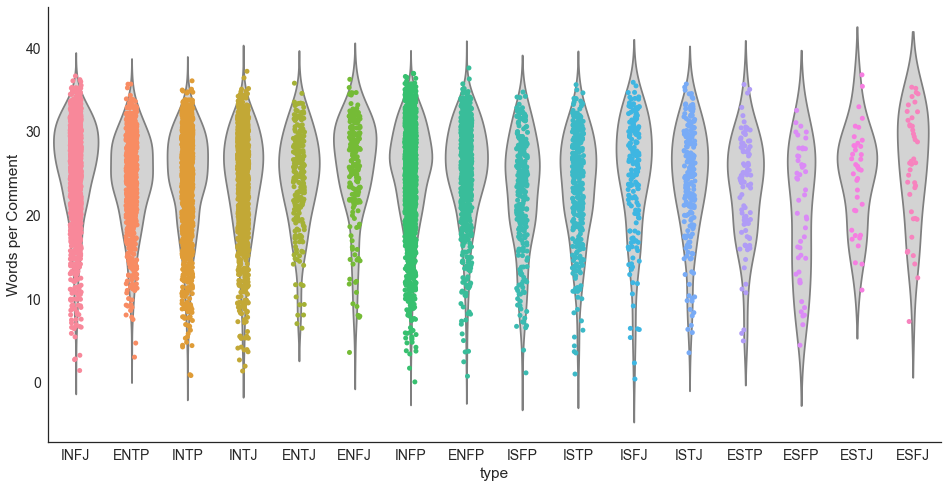

In [165]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()

#### As we can figure out from the graphic particularly last 4 ones are the combination of Extroversion type. Their posts in each comment have spread less than other types. 

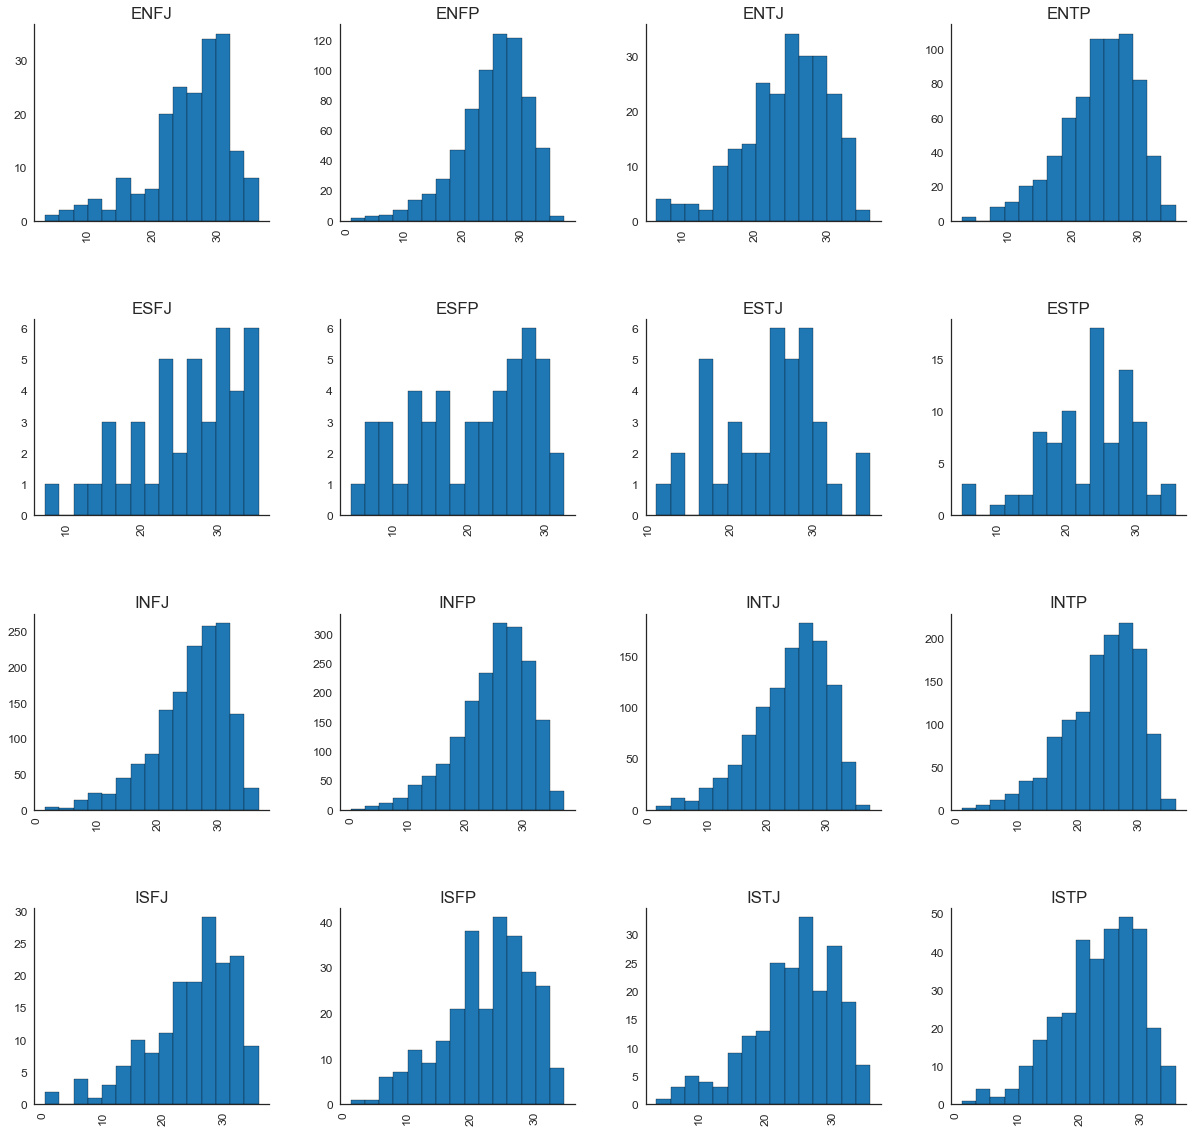

In [225]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=15, xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[0], edgecolor='black') 
sns.despine()

When we check the histogram plot of per comments of each personality types, Intoversion type's words counts in each posts seem distributed normal, on the other hand the word count of some of Etroversion type seems bimodel or multimodal

## Feature Correlation

In [167]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

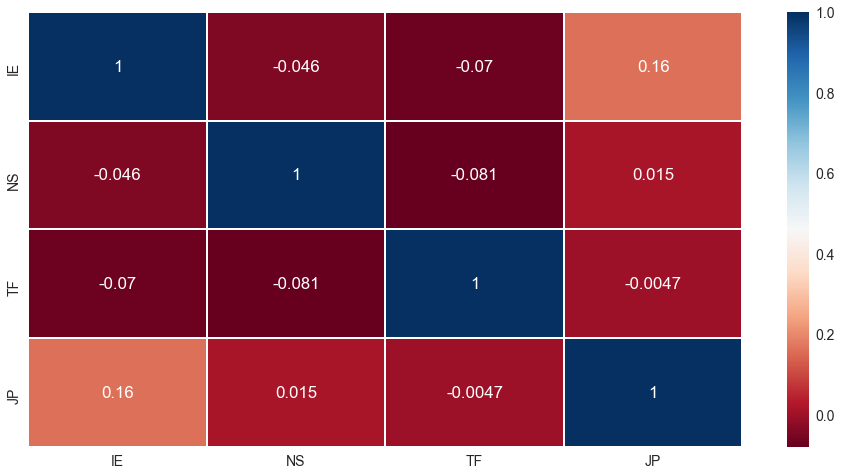

In [168]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)
plt.show()

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## Word Cloud

In [288]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [271]:
def wordcloud_show(personality_type):
        
        dataFile = df_2[df_2['type']==personality_type]
        text = str(dataFile['posts'].tolist())
        image_file = '{}'.format(personality_type)
        mask_type = np.array(Image.open(image_file+'.png'))
        stopwords = set(STOPWORDS)

        wc = WordCloud(background_color="white", max_words=2000, mask=mask_type, stopwords=stopwords,)
        # generate word cloud
        wc.generate(text)

        # create coloring from image
        image_colors = ImageColorGenerator(mask_type)

        # show
        plt.figure(figsize=(20,10))

        plt.subplot(121)
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(image_file, loc='Center', fontsize=14)
        plt.axis("off")

        plt.subplot(122)
        plt.imshow(mask_type, cmap=plt.cm.gray, interpolation="bilinear")
        
        if personality_type == 'INTJ':
            title_is = 'ARCHITECT'
        elif personality_type == 'INTP':
            title_is = 'LOGICIAN'
        elif personality_type == 'ENTJ':
            title_is = 'COMMANDER'
        elif personality_type == 'ENTP':
            title_is = 'DEBATER' 
        elif personality_type == 'INFJ':
            title_is = 'ADVOCATE'    
        elif personality_type == 'INFP':
            title_is = 'MEDIATOR'
        elif personality_type == 'ENFJ':
            title_is = 'PROTAGONIST'
        elif personality_type == 'ENFP':
            title_is = 'CAMPAIGNER' 
        elif personality_type == 'ISTJ':
            title_is = 'LOGISTICAN'
        elif personality_type == 'ISFJ':
            title_is = 'DEFENDER'
        elif personality_type == 'ESTJ':
            title_is = 'EXECUTIVE'
        elif personality_type == 'ESFJ':
            title_is = 'CONSUL'
        elif personality_type == 'ISTP':
            title_is = 'VIRTUOSO'
        elif personality_type == 'ISFP':
            title_is = 'ADVENTURER'
        elif personality_type == 'ESTP':
            title_is = 'ENTREPRENUER'
        elif personality_type == 'ESFP':
            title_is = 'ENTERTAINER'    
        plt.title(title_is, loc='Center', fontsize=14)
        plt.axis("off")

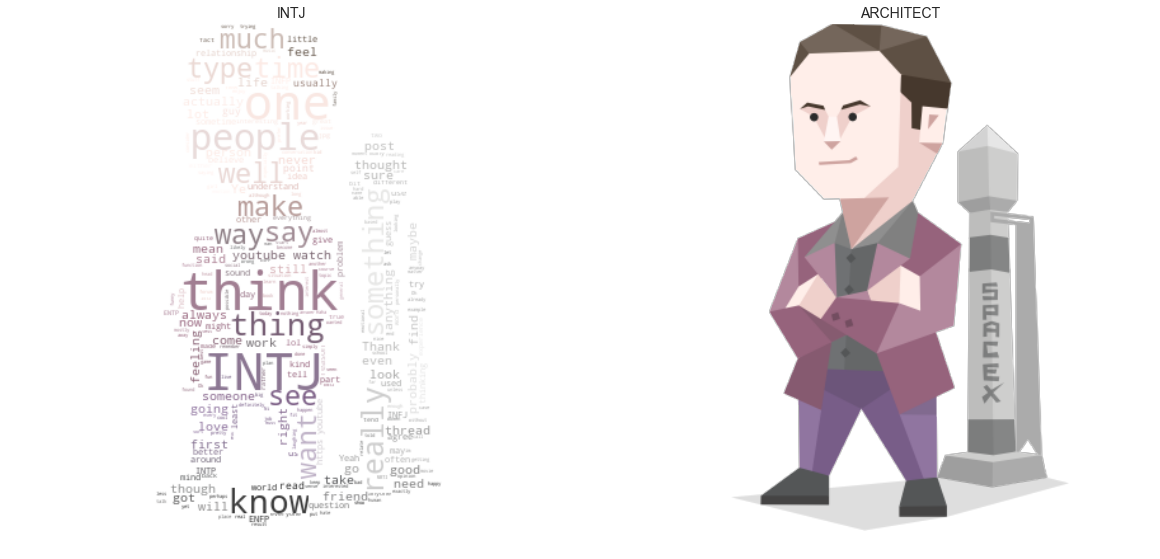

In [272]:
wordcloud_show('INTJ')

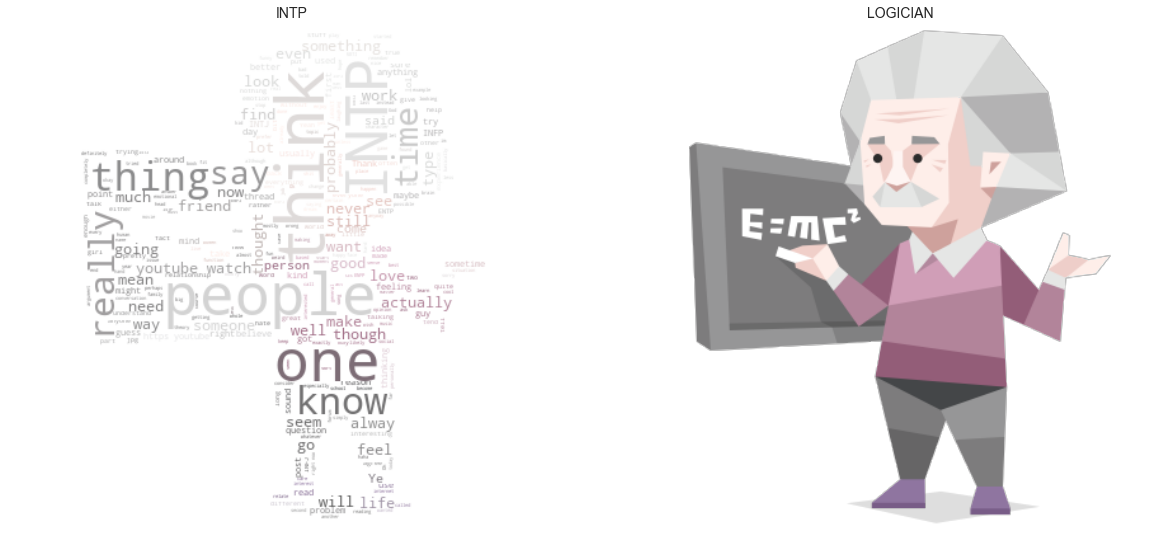

In [273]:
wordcloud_show('INTP')

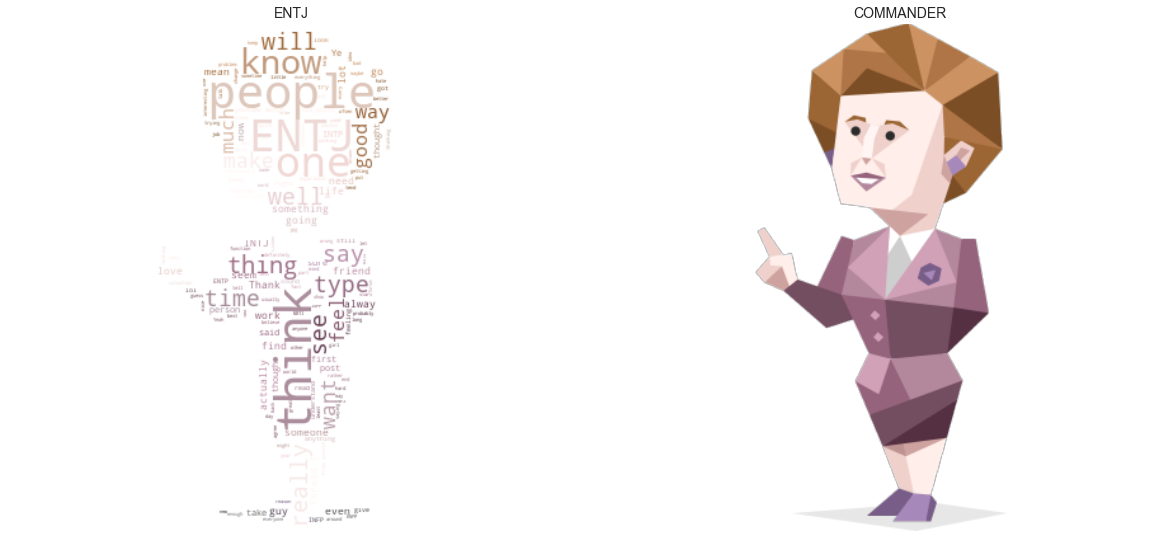

In [274]:
wordcloud_show('ENTJ')

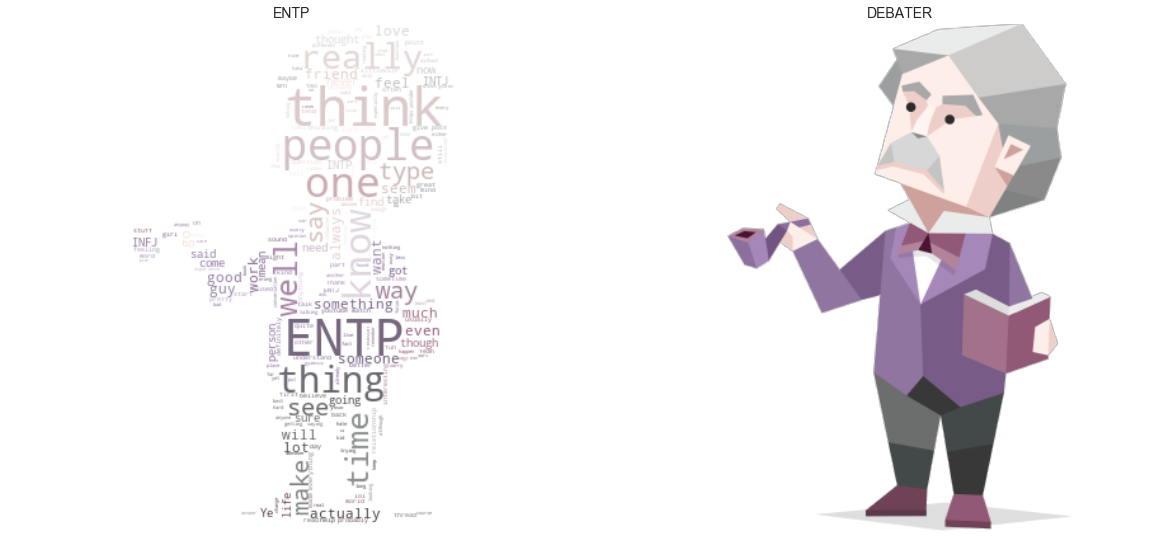

In [275]:
wordcloud_show('ENTP')

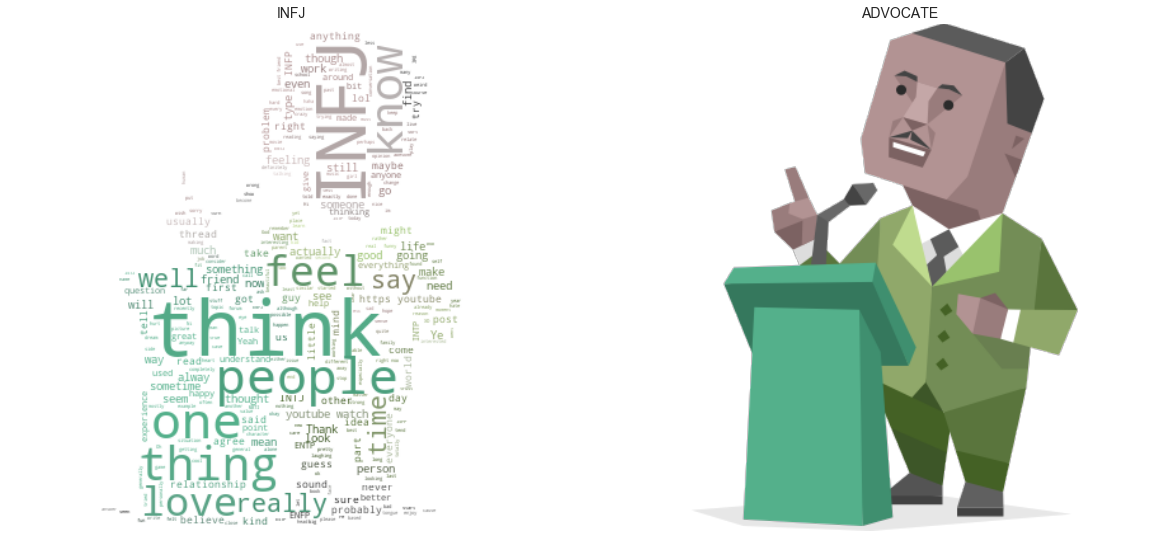

In [276]:
wordcloud_show('INFJ')

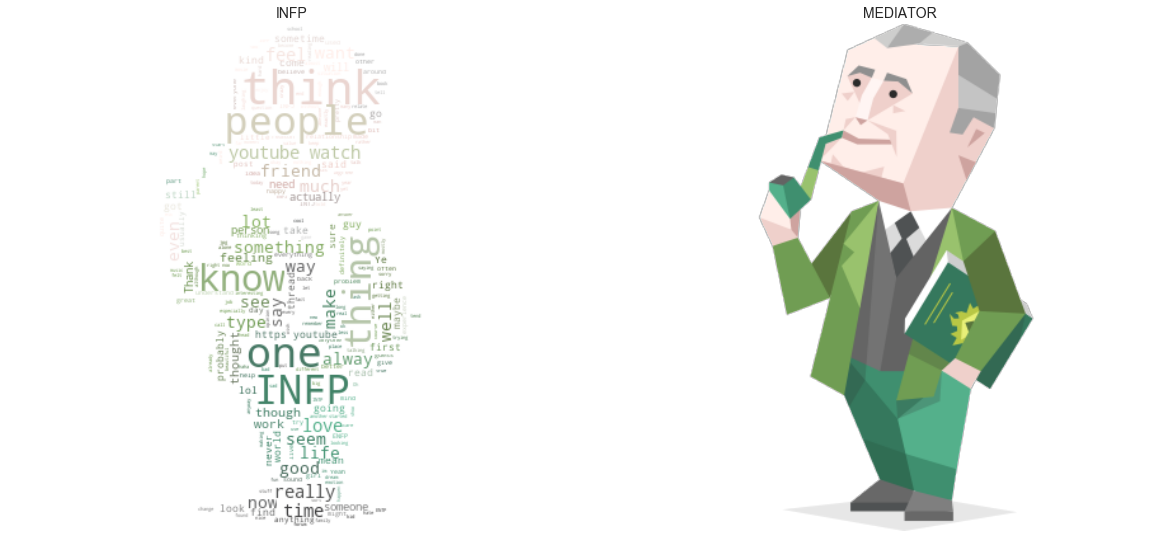

In [277]:
wordcloud_show('INFP')

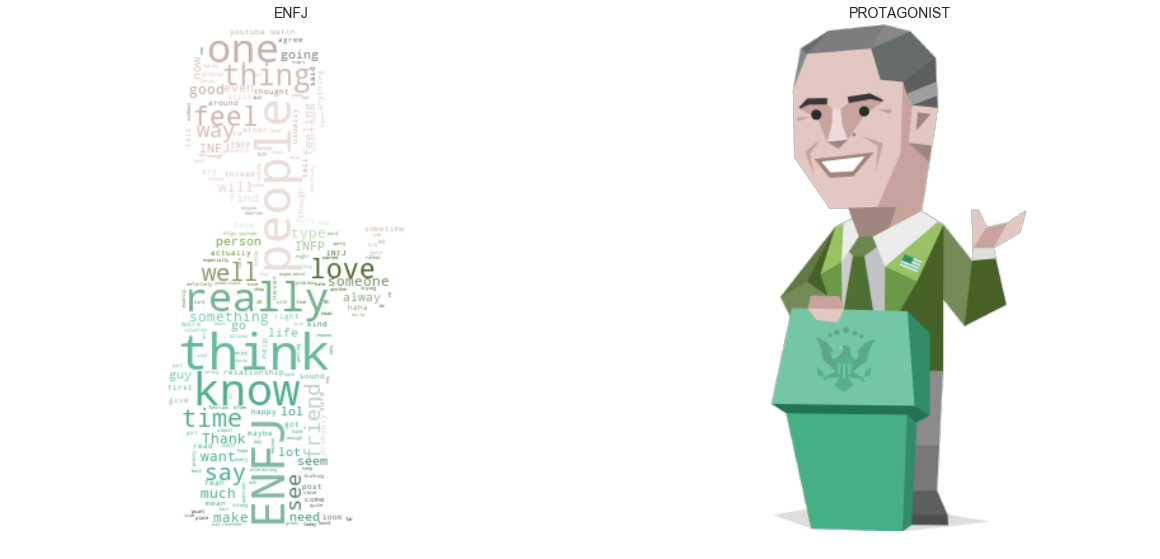

In [278]:
wordcloud_show('ENFJ')

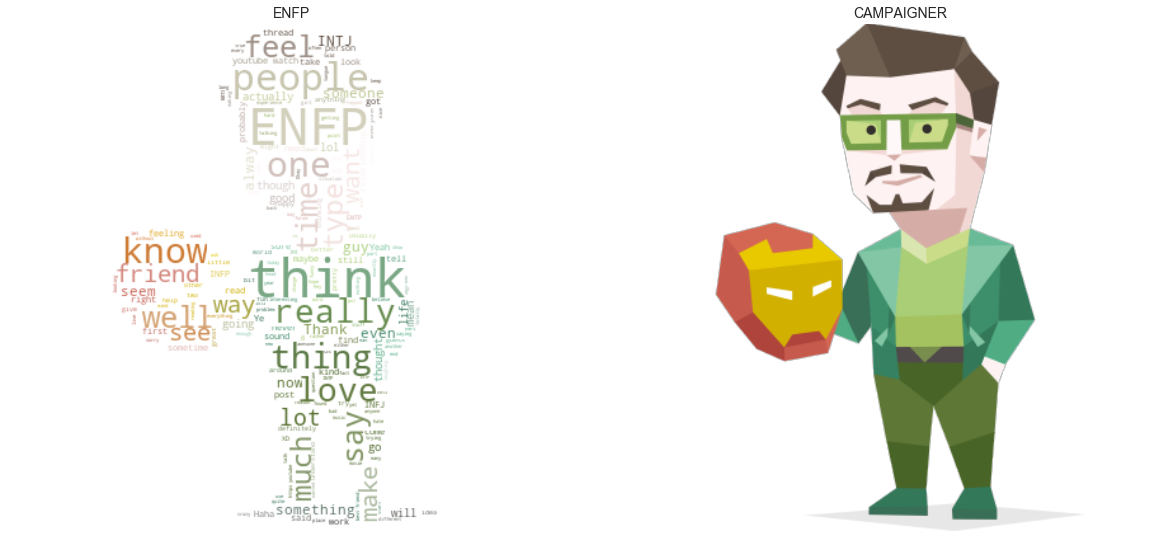

In [279]:
wordcloud_show('ENFP')

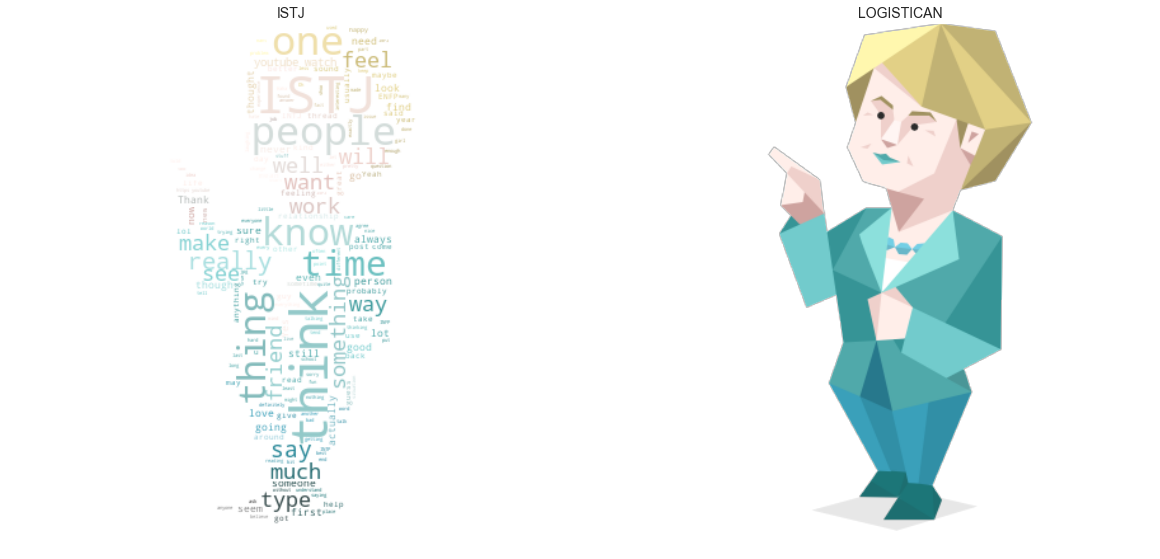

In [280]:
wordcloud_show('ISTJ')

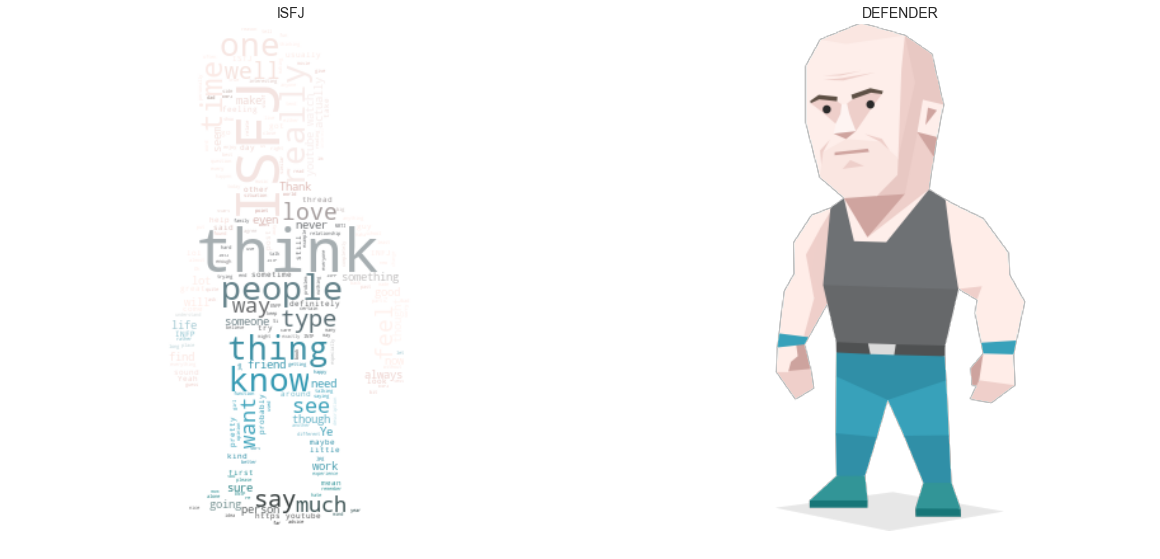

In [281]:
wordcloud_show('ISFJ')

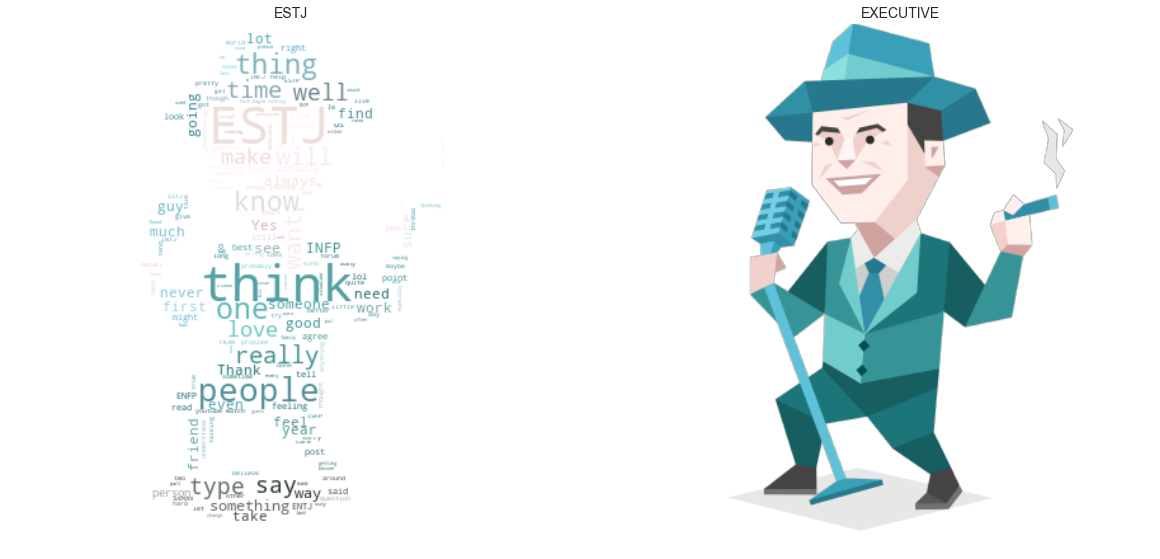

In [282]:
wordcloud_show('ESTJ')

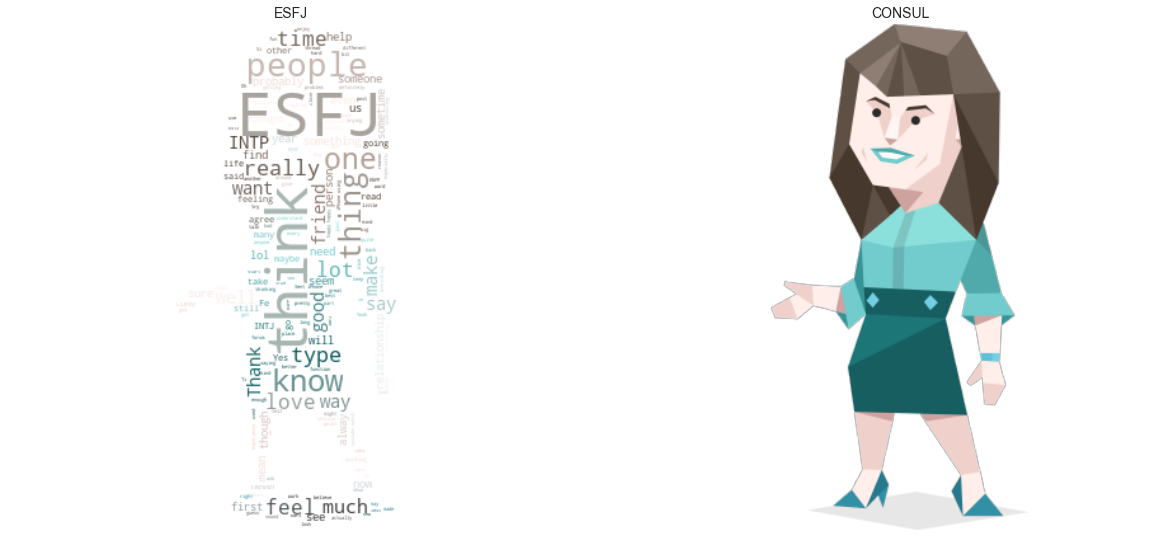

In [283]:
wordcloud_show('ESFJ')

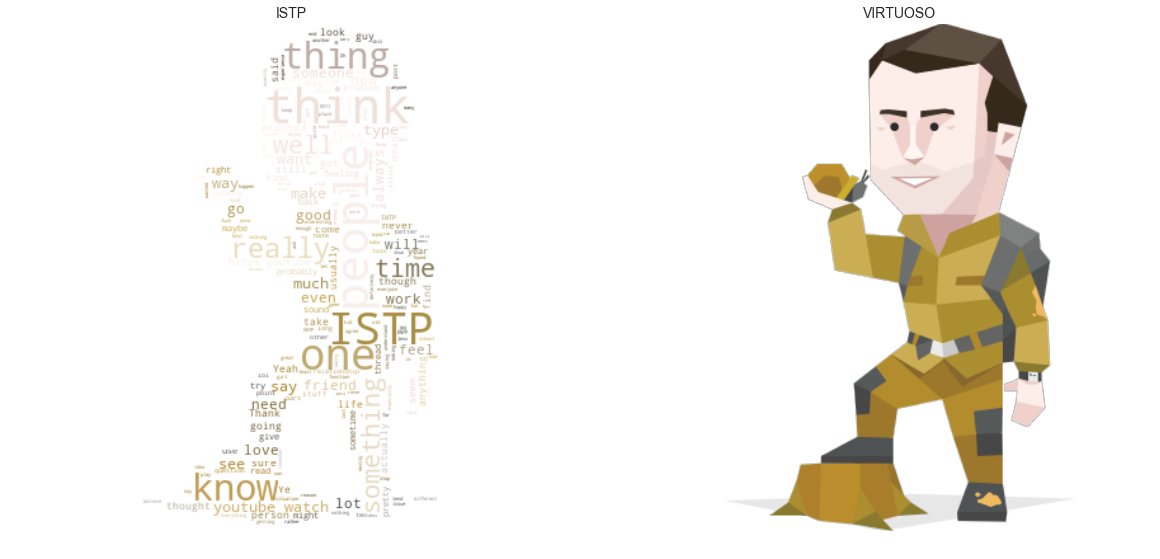

In [284]:
wordcloud_show('ISTP')

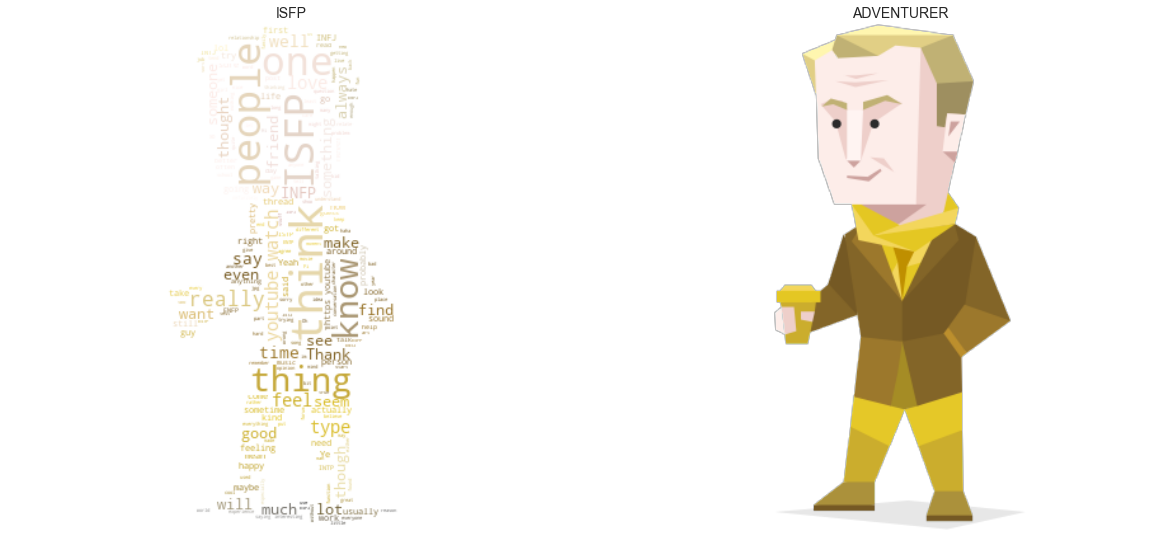

In [285]:
wordcloud_show('ISFP')

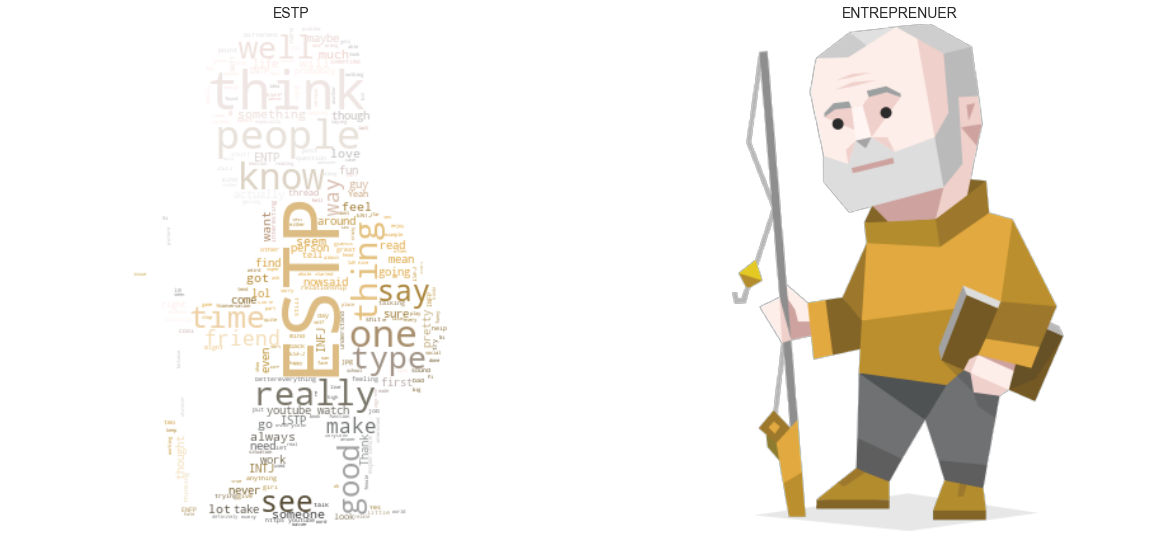

In [286]:
wordcloud_show('ESTP')

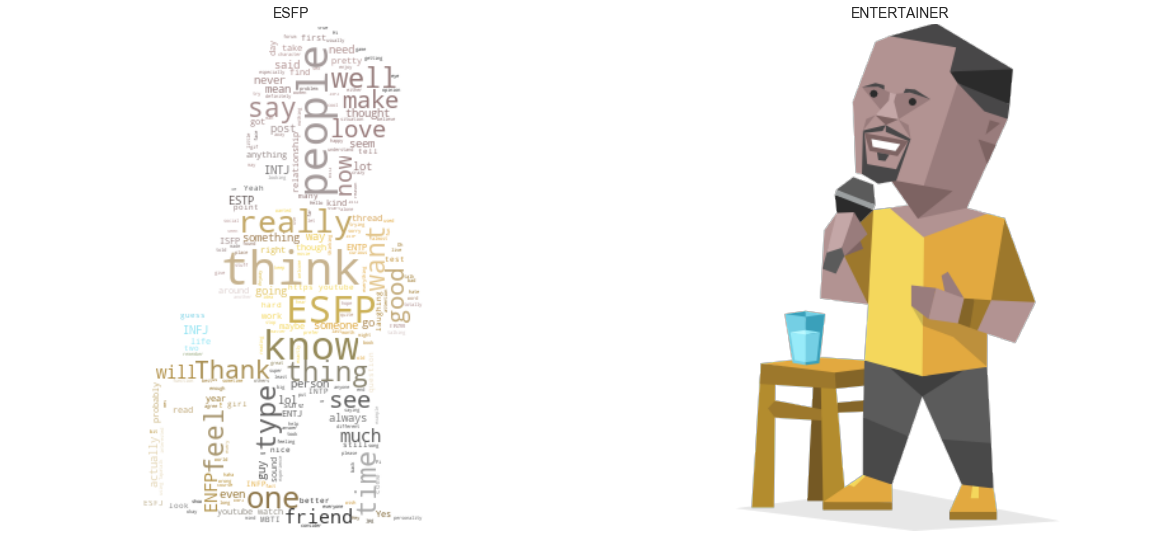

In [287]:
wordcloud_show('ESFP')

### For more information regarding  MBTI personality types, please see the image below. (Note: image is obtained from <https://www.businessinsider.com/best-jobs-for-every-personality-2014-9>)

![alt text](jobs.png "Jobs Based on MBTI Personality Types")

## Data Preprocessing

In [180]:
df_2 = pd.DataFrame()
df_2 = df.copy()

In [181]:
#preprocess all the mbti data
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

ps = PorterStemmer()
lemmatiser = WordNetLemmatizer()
                                              
def normalize_corpus(text, lowercase=True, remove_stop_words=True, remove_url=True):
    
    """[1] Lowercase the text 
       [2] Find URLs 
       [3] Remove links from posts 
       [4] Expending contractions 
       [5] Removing ||| seperators 
       [6] Removing whitespace 
       [7] Keep only words 
       [8] Remove apostrophe sign  
       [9] Remove stopwords and Stemming"""
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    ##[1] Lowercase the text
    if (lowercase==True):
        text = str(text).lower()
    
    ##[2] Find URLs
    global URLs
    URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+', text)
    #URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    
    ##[3] Removing Links 
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'', text)
    
    ##[4] Expending contractions such as I'm, you're into I am, you are
    text = contractions.fix(text)
    
    ##[5] Removing ||| seperators
    text = re.sub(r'\|\|\|', r' ', text) 
    
    ##[6] Removing whitespace
    text = re.sub(r'nbsp', r'', text)
    
    ##[7] Keeping only words
    text = re.sub(r'[^a-zA-Z]',r' ', text)
    
    ##[8] Removing ' (apostrophe) sign
    text = re.sub(r"'", r'', text)    
    
    ##[9] Removing stopwords and Lemmatization
    if (remove_stop_words==True):
        
        text = " ".join([ps.stem(w) for w in text.split(' ') if w not in stopword_list])
        
    else:
        
        text = " ".join([ps.stem(w) for w in text.split(' ')])
        
    return text

In [182]:
def remove_mbti_profiles(text):
    
   ## Removing MBTI profile types from the text

    text = re.sub(r'intp', r'', text)
    text = re.sub(r'intj', r'', text)
    text = re.sub(r'infj', r'', text)
    text = re.sub(r'infp', r'', text)
    text = re.sub(r'entp', r'', text)
    text = re.sub(r'enfp', r'', text)
    text = re.sub(r'istp', r'', text)
    text = re.sub(r'entj', r'', text)
    text = re.sub(r'isfj', r'', text)
    text = re.sub(r'enfj', r'', text)
    text = re.sub(r'isfp', r'', text)
    text = re.sub(r'esfp', r'', text)
    text = re.sub(r'estp', r'', text)
    text = re.sub(r'estj', r'', text)
    text = re.sub(r'esfj', r'', text)
    text = re.sub(r'istj', r'', text)
    return text

In [183]:
## This clean_text contains MBTI profile names in the posts.
df_2['clean_text'] = df_2['posts'].map(lambda text: normalize_corpus(text))

In [184]:
## text_without_mbti column does not contain any MBTI profiles in the posts. All MBTI profiles which alreay mentioned in the posts have been removed to make prediction more realistic
df_2['clean_text_without_mbti'] = df_2['clean_text'].map(lambda text: remove_mbti_profiles(text))

In [185]:
URLs

['http://www.youtube.com/watch?v=6eew-9ndm5k',
 'http://www.youtube.com/watch?v=i1gmxmtwugs&amp;feature=plcp',
 'http://www.youtube.com/watch?v=elpmmet69ce']

In [186]:
## We can select 5 random cleaned_text from our corpus
#df_2.iloc[np.random.choice(len(df_2),2)]
df_2.head(2)

type  \
0  INFJ   
1  ENTP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http:

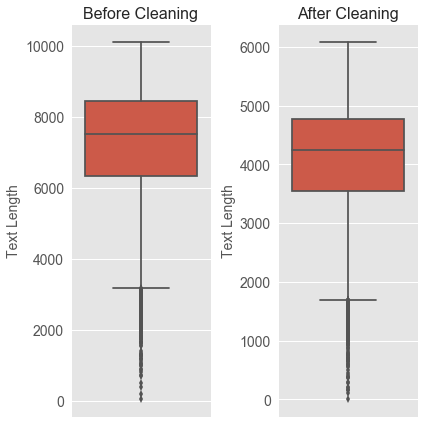

In [187]:
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
plt.style.use('ggplot')

fig, axs = plt.subplots(ncols=2, figsize=(6,6))
sns.boxplot(y=df_2['post_length'], ax=axs[0])
sns.boxplot(y=df_2['clean_text'].map(len), ax=axs[1])

axs[0].set_ylabel('Text Length', fontsize=14)
axs[1].set_ylabel('Text Length', fontsize=14)


axs[0].set_title('Before Cleaning', fontsize=16)
axs[1].set_title('After Cleaning', fontsize=16)
plt.tight_layout()
plt.show()

In [188]:
df_2['clean_text'].map(lambda x: word_tokenize(x))

0                                                    [enfp, intj, moment, sportscent, not, top, ten, play, prank, life, chang, experi, life, repeat, today, may, perc, experi, immers, last, thing, infj, friend, post, facebook, commit, suicid, next, day, rest, peac, hello, enfj, sorri, hear, distress, natur, relationship, not, perfect, time, everi, moment, exist, tri, figur, hard, time, time, growth, welcom, stuff, game, set, match, prozac, wellbrutin, least, thirti, minut, move, leg, not, mean, move, sit, desk, chair, weed, moder, mayb, tri, edibl, healthier, altern, basic, come, three, item, determin, type, whichev, type, want, would, like, use, given, type, cognit, function, whatnot, left, thing, moder, sim, inde, video, game, good, ...]
1                    [find, lack, post, alarm, sex, bore, posit, often, exampl, girlfriend, current, environ, creativ, use, cowgirl, missionari, not, enough, give, new, mean, game, theori, hello, entp, grin, take, convers, flirt, acknowledg, presenc, 

In [189]:
from collections import Counter

In [190]:
df_2['word_freq'] = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

# This method for sorting unless use most_common
#df_2['word_freq'] = df_2['word_freq'].map(lambda x: sorted(x.items(), key=lambda y: y[1], reverse=True))

In [191]:
df_2.head(1)

type  \
0  INFJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   

   post_length  IE  JP  NS  TF  words_per_comment  \
0         4652   1   1   1   0              11.12   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [192]:
most_commons = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

In [193]:
import operator

a = list(map(operator.itemgetter(1), most_commons[0]))
b = list(map(operator.itemgetter(0), most_commons[0]))

## Splitting Into Train and Test Set

In [46]:
## We split the data 80% as train set and 20% as test set

def spliting_train_test(text, target):

    X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2, random_state=33)
    return X_train, X_test, y_train, y_test

In [47]:
# X_train, X_test, y_train, y_test for with MBTI profile names in clean text
X_train, X_test, y_train, y_test = spliting_train_test(df_2['clean_text'], df_2['type'])


# X_train_1, X_test_1, y_train_1, y_test_1 for withou MBTI profile names in clean text
X_train_1, X_test_1, y_train_1, y_test_1 = spliting_train_test(df_2['clean_text_without_mbti'], df_2['type'])



In [48]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train_1.shape, X_test_1.shape))

Train Set Shape		:(6940,)
Test Set Shape		:(1735,)


There is no missing value in our dataset, which is good.

## CountVectorizing

In [50]:
# count_vect ==> with MBTI profile names in clean text
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)


# count_vect_1 ==> without MBTI profile names in clean text
count_vect_1 = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train_1 = count_vect_1.fit_transform (X_train_1)
count_vect_train_1 = count_vect_train_1.toarray()
count_vect_test_1 = count_vect_1.transform(X_test_1)


count_vect_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 4000
Longest word   : straightforward


In [52]:
vocab = count_vect.get_feature_names()

In [53]:
#vocab = count_vect.get_feature_names()
pd.DataFrame(count_vect_train, columns=vocab).head()

abandon  abil  abl  abnorm  abort  abroad  absenc  absent  absolut  absorb  abstract  absurd  abus  academ  accent  accept  access  accid  accident  accommod  accomplish  accord  account  accur  accuraci  accus  ace  achiev  acid  acknowledg  acquaint  acquir  across  act  action  activ  actor  actress  actual  ad  adam  adapt  add  addict  addit  address  adhd  adher  adjust  admin  administr  admir  admit  admittedli  adopt  ador  adrenalin  adult  advanc  advantag  adventur  advertis  advic  advis  advoc  aesthet  affair  affect  affection  affirm  afford  afraid  africa  afternoon  afterward  age  agenda  agent  aggress  agnost  ago  agre  agreement  ah  aha  ahead  ahem  ahh  ahhh  ai  aid  aim  air  aka  al  ala  alarm  albeit  album  alcohol  alert  algebra  alic  alien  align  \
0        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       0       0      0         0         0           0       0        0      1         0      0    0       0     0           0         0       0       0    1       0      0      0        0       0   0     0      0    0       0      0        0     0      0       0      0          0      0      0           0      0     1          0      0       0         0         0         0      0      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    0     0          0   0    0      0     0    0     0   0    0    0    0    0   0    1      0       0      0        0      0        0     0      0      0   
1        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       1       0      0         0         0           0       0        0      0         0      0    0       1     0           0         0       0       0    1       0      0      0        0       1   0     0      0    2       0      0        0     1      0       0      0          0      0      0           0      0     0          0      0       0         0         1         0      0      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    1     2          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0   
2        0     0    0       0      0       0       0       0        0       0         0       0     1       0       0       3       0      0         0         0           1       0        1      0         0      0    0       0     0           0         0       0       0    0       0      0      0        0       2   0     0      0    0       1      0        0     3      0       0      0          0      0      1           0      0     0          0      0       0         0         0         0      1      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    4     0          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0   
3        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       0       0      0         0         0           0       0        0      0         0      0    0       0     0           0         0       0       1    0       0      0      0        0       3   0     0      0    2       0      0        0     0      0       0      0          0      0      0           0      0     0          0      0       0         0         0         0      1      0      0        0       0       0          0       0       0       0       0          0          0    1       0      0        0       0    1     0          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0  

## Tf-idf Vectorizing

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# With MBTI profiles name in the celan text
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)

# Without MBTI profiles name in the celan text
tfidf_vect_1 = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train_1 = tfidf_vect_1.fit_transform(X_train_1)
tfidf_vect_train_1 = tfidf_vect_train_1.toarray()
tfidf_vect_test_1 = tfidf_vect_1.transform(X_test_1)

In [55]:
print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Longest word: straightforward


In [56]:
vocab = tfidf_vect.get_feature_names()
pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head()

abandon  abil   abl  abnorm  abort  abroad  absenc  absent  absolut  absorb  abstract  absurd  abus  academ  accent  accept  access  accid  accident  accommod  accomplish  accord  account  accur  accuraci  accus  ace  achiev  acid  acknowledg  acquaint  acquir  across   act  action  activ  actor  actress  actual   ad  adam  adapt   add  addict  addit  address  adhd  adher  adjust  admin  administr  admir  admit  admittedli  adopt  ador  adrenalin  adult  advanc  advantag  adventur  advertis  advic  advis  advoc  aesthet  affair  affect  affection  affirm  afford  afraid  africa  afternoon  afterward   age  agenda  agent  aggress  agnost   ago  agre  agreement   ah  aha  ahead  ahem  ahh  ahhh   ai  aid  aim  air  aka   al   ala  alarm  albeit  album  alcohol  alert  algebra  alic  \
0      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.00     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.03       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.00  0.02     0.0    0.0    0.0      0.0    0.00  0.0   0.0    0.0  0.00    0.00    0.0      0.0  0.00    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.04        0.0    0.0     0.0       0.0      0.00       0.0   0.00    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.00  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.06    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
1      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.03     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.00       0.0    0.0  0.0    0.04   0.0         0.0       0.0     0.0    0.00  0.03     0.0    0.0    0.0      0.0    0.02  0.0   0.0    0.0  0.06    0.00    0.0      0.0  0.05    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.04       0.0   0.00    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.02  0.04        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
2      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.05     0.0     0.0    0.10     0.0    0.0       0.0       0.0        0.05     0.0     0.04   0.00       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.00  0.00     0.0    0.0    0.0      0.0    0.04  0.0   0.0    0.0  0.00    0.05    0.0      0.0  0.18    0.0     0.0    0.0        0.0    0.0   0.04         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.00       0.0   0.03    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.11  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
3      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.00     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.00       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.04  0.00     0.0    0.0    0.0      0.0    0.06  0.0   0.0    0.0  0.07    0.00    0.0      0.0  0.00    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.00       0.0   0.03    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.03     0.0   0.00      0.0     0.0  0.03  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
4      0.0  0.03  

In [198]:
def get_tfidf_parameters():
    
    param =  {
        'tfidf__analyzer':("word",),
        'tfidf__max_features':(1000, 2000, 4000, 6000),
        'tfidf__max_df': (0.7, 0.85, ),
        'tfidf__min_df': (0.01, 0.01, ),
        'tfidf__stop_words': (None,),
        'tfidf__preprocessor': (None,),
        'tfidf__tokenizer':(None,),
        'tfidf__lowercase':(False,)
    }
    return param

def get_countvect_parameters():
    
    param =  {
        'countvectorizer__analyzer':("word",),
        'countvectorizer__max_features':(1000, 2000, 4000, 6000),
        'countvectorizer__max_df': (0.7, 0.85, ),
        'countvectorizer__min_df': (0.01, 0.1, ),
        'countvectorizer__stop_words':(None,),
        'countvectorizer__preprocessor':(None,),
        'countvectorizer__tokenizer':(None,),
        'countvectorizer__lowercase':(False,)
    }
    return param

def get_logreg_parameters():
    
    param = {
        'clf__penalty': ('l1','l2'),
        'clf__C':[0.01, 0.05, 0.5, 1, 10, 100, 1000]
        #'clf__class_weight':('balanced')
    }
    return param

def get_SVM_parameters():
    
    param = {
        'clf__C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}
    return param

def get_xgb_parameters():
    
    param = {
        'clf__max_depth':[4,6,8,10]}
    return param  
    


In [199]:
tfidf_param = get_tfidf_parameters()
countvect_param= get_countvect_parameters()
logreg_param= get_logreg_parameters()
SVM_param = get_SVM_parameters()
xgb_param = get_xgb_parameters()

params_lr_CV = {**countvect_param, **logreg_param}
params_SVM_CV = {**countvect_param, **SVM_param}
params_xgb_CV = {**countvect_param, **xgb_param}

params_lr_TV = {**tfidf_param, **logreg_param}
params_SVM_TV = {**tfidf_param, **SVM_param}
params_xgb_TV = {**tfidf_param, **xgb_param}

In [200]:
parameters = [params_lr_CV, params_lr_TV, params_SVM_CV, params_SVM_TV, params_xgb_CV, params_xgb_TV]

In [201]:
## pipeline for Logistic Regresssion of Count Vectorizer
pipe_lr_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

## pipeline for Linear SVM of Count Vectorizer
pipe_SVM_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

## pipeline for XGBOOST of Count Vectorizer
pipe_xgb_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

## pipeline for Logistic Regression of TF-IDF Vectorizer 
pipe_lr_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

## pipeline for Linear SVM of TF-IDF Vectorizer 
pipe_SVM_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

## pipeline for XGBOOST of TF-IDF Vectorizer 
pipe_xgb_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [202]:
gs_lr_CV = GridSearchCV(estimator=pipe_lr_CV,
                     #param_grid=logreg_param,
                     param_grid=params_lr_CV,    
                     scoring='accuracy',n_jobs=-1, cv=5) 

gs_lr_TV = GridSearchCV(estimator=pipe_lr_TV,
                     #param_grid=logreg_param,
                     param_grid=params_lr_TV,
                     scoring='accuracy',n_jobs=-1, cv=5) 

gs_SVM_CV = GridSearchCV(estimator=pipe_SVM_CV,
                     #param_grid=SVM_param,
                    param_grid=params_SVM_CV,
                     scoring='accuracy', n_jobs=-1, cv=5) 

gs_SVM_TV = GridSearchCV(estimator=pipe_SVM_TV,
                     #param_grid=SVM_param,
                     param_grid=params_SVM_TV,
                     scoring='accuracy', n_jobs=-1, cv=5)

gs_xgb_CV = GridSearchCV(estimator=pipe_xgb_CV,
                     #param_grid = params_xgb_CV,
                    param_grid=params_xgb_CV,
                     scoring='accuracy', n_jobs=-1, cv=5) 

gs_xgb_TV = GridSearchCV(estimator=pipe_xgb_TV,
                     #param_grid = params_xgb,
                     param_grid=params_xgb_TV,
                     scoring='accuracy', n_jobs=-1, cv=5)

In [203]:
pipelines = [pipe_lr_CV, pipe_lr_TV, pipe_SVM_CV, pipe_SVM_TV, pipe_xgb_CV, pipe_xgb_TV] 

In [204]:
grids = [gs_lr_CV, gs_lr_TV, gs_SVM_CV, gs_SVM_TV, gs_xgb_CV, gs_xgb_TV]

In [205]:
grid_dict = {0: 'LOGISTIC REGRESSION with CountVect', 1: 'LOGISTIC REGRESSION with TF-IDF', 2: 'LINEAR_SVM with CountVect', 3:'LINEAR_SVM with TF-IDF', 4:'XGBOOST with CountVect', 5:'XGBOOST with TFIDF'}

In [206]:
def print_model_stat(grid_search, pipeline, parameters, clfname, method_name):
    
    print('')
    print("Performing grid search for ",clfname," by ", method_name, '>>>>>')
    print("Pipeline:", [name for name, _ in pipeline.steps])
    #print("parameters:")
    #print(parameters)    
    print()
    print("Train Set_Best score: %0.3f" % grid_search.best_score_)
    print()
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))    

In [207]:
import warnings
warnings.filterwarnings('ignore')


def model_run(text_data, binary_classification=True):
    
    """This function takes the text as a parameter and then implement gridsearch iot find the optimal parameters"""
    
    model_dict = dict()
    seed=33
    test_size=0.25
    
    if binary_classification==True:
        
        cols = ['IE', 'NS', 'TF', 'JP']
    
        for col in cols:
    
            Y = np.array(df_2[col])
            
            # The parameter is used as data set to be split into X_train and X_train
            X_train, X_test, y_train, y_test = train_test_split(text_data, Y, test_size = test_size, random_state = seed)
    
            best_acc = 0
            best_clf = 0
            best_gs = ''
    
            for idx, gs in enumerate(grids): 
        
                gs.fit(X_train, y_train)
        
                print_model_stat(gs, pipelines[idx], parameters[idx], col, grid_dict[idx])
        
                model = gs.best_estimator_

                y_pred = model.predict(X_test)

                # evaluate predictions
                accuracy = accuracy_score(y_test, y_pred)
                print("* %s Test Set_Accuracy         : %.2f%%" % (col, accuracy * 100.0))
                print("* %s Baseline Accuracy         : %.2f%%" % (col, max(np.count_nonzero(y_test),len(y_test)-np.count_nonzero(y_test))/len(y_test) * 100.0))
                model_dict[col] = model
                print('______________________________________________________________________')
                print('\n')
        
                if accuracy_score(y_test, y_pred) > best_acc:
                    best_acc = accuracy_score(y_test, y_pred)
                    best_gs = gs
                    best_clf = idx
            print('______________________________________________________________________')
            print('\nClassifier With Best Test Set Accuracy of {0} is {1}'.format(col, grid_dict[best_clf]))
            print('______________________________________________________________________')
            
    else:
            
        Y = np.array(df_2['type'])
            
        # The parameter is used as data set to be split into X_train and X_train
        X_train, X_test, y_train, y_test = train_test_split(text_data, Y, test_size = test_size, random_state = seed)
    
        best_acc = 0
        best_clf = 0
        best_gs = ''
    
        for idx, gs in enumerate(grids): 
        
            gs.fit(X_train, y_train)
        
            print_model_stat(gs, pipelines[idx], parameters[idx], y_train, grid_dict[idx])
        
            model = gs.best_estimator_

            y_pred = model.predict(X_test)

            # evaluate predictions
            accuracy = accuracy_score(y_test, y_pred)
            print("Test Set_Accuracy         : %.2f%%" % (accuracy * 100.0))
            
            # Most frequent class occurance is considered as teh baselien accuracy
            print("Baseline Accuracy         : %.2f%%" % ((df_2['type'].value_counts()[0]/len(df_2['type']))*100))
            #model_dict[col] = model
            print('______________________________________________________________________')
            print('\n')
        
            if accuracy_score(y_test, y_pred) > best_acc:
                best_acc = accuracy_score(y_test, y_pred)
                best_gs = gs
                best_clf = idx
        print('______________________________________________________________________')
        print('\nClassifier With Best Test Set Accuracy is {}'.format(grid_dict[best_clf]))
        print('______________________________________________________________________')
            

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">__PART-1: PREDICTIONS WITHOUT REMOVING MBTI LABELS FROM TEXT__

In [96]:
import time
t = time.time()
model_run(df_2['clean_text'], binary_classification=False)
time.time()- t


Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.669

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
Test Set_Accuracy         : 67.04%
Baseline Accuracy         : 21.12%
______________________________________________________________________



Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.696

Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 4000
	tfidf__mi

58748.46500992775

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">__PART-2: PREDICTIONS WITH REMOVING MBTI LABELS FROM TEXT__

In [97]:
t = time.time()
model_run(df_2['clean_text_without_mbti'], binary_classification=False)
time.time()- t


Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.368

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.85
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
Test Set_Accuracy         : 36.19%
Baseline Accuracy         : 21.12%
______________________________________________________________________



Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.395

Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 4000
	tfidf__

41340.52652478218

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-3: PREDICTIONS WITHOUT REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

In [196]:
t = time.time()
model_run(df_2['clean_text'], binary_classification=True)
time.time() - t


Performing grid search for  IE  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.841

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l1'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.85
	countvectorizer__max_features: 1000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* IE Test Set_Accuracy         : 84.51%
* IE Baseline Accuracy         : 77.50%
______________________________________________________________________



Performing grid search for  IE  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.851

Best parameters set:
	clf__C: 0.5
	clf__penalty: 'l1'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 1000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokeniz


Performing grid search for  TF  by  LINEAR_SVM with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.857

Best parameters set:
	clf__C: 1e-05
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 1000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* TF Test Set_Accuracy         : 85.75%
* TF Baseline Accuracy         : 52.70%
______________________________________________________________________



Performing grid search for  TF  by  LINEAR_SVM with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.859

Best parameters set:
	clf__C: 0.1
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 2000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer: None
* TF Test Set_Accuracy         : 85.62%
* TF Base

60106.60147309303

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-4: PREDICTIONS WITH REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

In [208]:
t = time.time()
model_run(df_2['clean_text_without_mbti'], binary_classification=True)
time.time() - t


Performing grid search for  IE  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.716

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* IE Test Set_Accuracy         : 73.08%
* IE Baseline Accuracy         : 77.50%
______________________________________________________________________



Performing grid search for  IE  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.730

Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 4000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer:


Performing grid search for  TF  by  LINEAR_SVM with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.785

Best parameters set:
	clf__C: 0.0001
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* TF Test Set_Accuracy         : 77.27%
* TF Baseline Accuracy         : 52.70%
______________________________________________________________________



Performing grid search for  TF  by  LINEAR_SVM with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.795

Best parameters set:
	clf__C: 0.1
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 4000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer: None
* TF Test Set_Accuracy         : 78.28%
* TF Bas

92916.78333091736

# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">__PART-1: PREDICTIONS WITHOUT REMOVING MBTI LABELS FROM TEXT__

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;">PREDICTIONS WITH COUNTVECTORIZING

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [72]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [73]:
np.random.seed(1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

## Logistic Regression with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [74]:
logreg_CV = LogisticRegression(random_state=0)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print (classification_report(y_test, y_pred_lr_CV))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

       ENFJ       0.43      0.42      0.43        31
       ENFP       0.46      0.49      0.48       112
       ENTJ       0.61      0.40      0.48        50
       ENTP       0.57      0.50      0.53       145
       ESFJ       0.67      0.22      0.33         9
       ESFP       0.50      0.17      0.25        12
       ESTJ       0.67      0.29      0.40         7
       ESTP       0.67      0.40      0.50        15
       INFJ       0.52      0.59      0.55       269
       INFP       0.63      0.66      0.64       387
       INTJ       0.54      0.56      0.55       214
       INTP       0.56      0.65      0.60       267
       ISFJ       0.69      0.60      0.64        30
       ISFP       0.54      0.34      0.42        58
       ISTJ       0.58      0.45      0.51        47
       ISTP       0.61      0.52      0.56        82

avg / total       0.57      0.56      0.56      1735

-------------------------------------------

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">With GridSearch

In [75]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g = GridSearchCV(estimator=lr_classifierCV, param_grid=parameters, cv=5)

In [76]:
logreg_CV_g.fit(count_vect_train, y_train)
y_pred_lr_CV_g = logreg_CV_g.predict(count_vect_test)

In [77]:
print (classification_report(y_test, y_pred_lr_CV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV_g))

             precision    recall  f1-score   support

       ENFJ       0.46      0.68      0.55        31
       ENFP       0.57      0.60      0.58       112
       ENTJ       0.38      0.54      0.44        50
       ENTP       0.73      0.67      0.70       145
       ESFJ       0.29      0.44      0.35         9
       ESFP       0.15      0.33      0.21        12
       ESTJ       0.25      0.57      0.35         7
       ESTP       0.39      0.60      0.47        15
       INFJ       0.75      0.60      0.67       269
       INFP       0.79      0.72      0.76       387
       INTJ       0.71      0.71      0.71       214
       INTP       0.77      0.73      0.75       267
       ISFJ       0.59      0.73      0.66        30
       ISFP       0.51      0.60      0.56        58
       ISTJ       0.49      0.62      0.55        47
       ISTP       0.63      0.68      0.65        82

avg / total       0.69      0.67      0.68      1735

___________________________________________

In [78]:
logreg_CV_g.best_params_

{'C': 0.05, 'penalty': 'l1'}

In [79]:
logreg_CV_g.best_score_

0.66296829971181559

In [80]:
heat_map_order=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

Text(0.5,65,'Predicted Label')

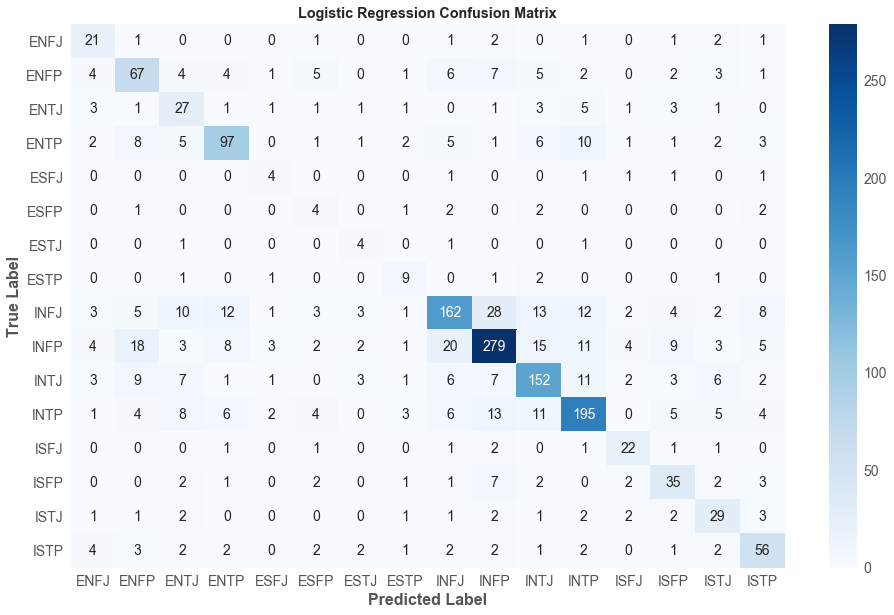

In [81]:
logreg_conf_mat = confusion_matrix(y_test,y_pred_lr_CV_g)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')

## Random Forest with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [82]:
rf_CV = RandomForestClassifier(random_state=0)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.382708933718


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">With GridSearch

In [83]:
parameters = {'n_estimators':[500, 1000, 1500, 2000, 2500, 3000]}

rand_forest_CV = RandomForestClassifier(random_state=0)
rf_CV = GridSearchCV(estimator=rand_forest_CV, param_grid=parameters, cv=5)

In [84]:
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)

In [85]:
print (classification_report(y_test, y_pred_rf_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.67      0.25      0.36       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.84      0.37      0.51       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.55      0.64      0.59       269
       INFP       0.45      0.90      0.60       387
       INTJ       0.67      0.56      0.61       214
       INTP       0.58      0.76      0.66       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.00      0.00      0.00        47
       ISTP       0.88      0.17      0.29        82

avg / total       0.51      0.54      0.48      1735

___________________________________________

In [86]:
rf_CV.best_params_

{'n_estimators': 2000}

Text(0.5,65,'Predicted Label')

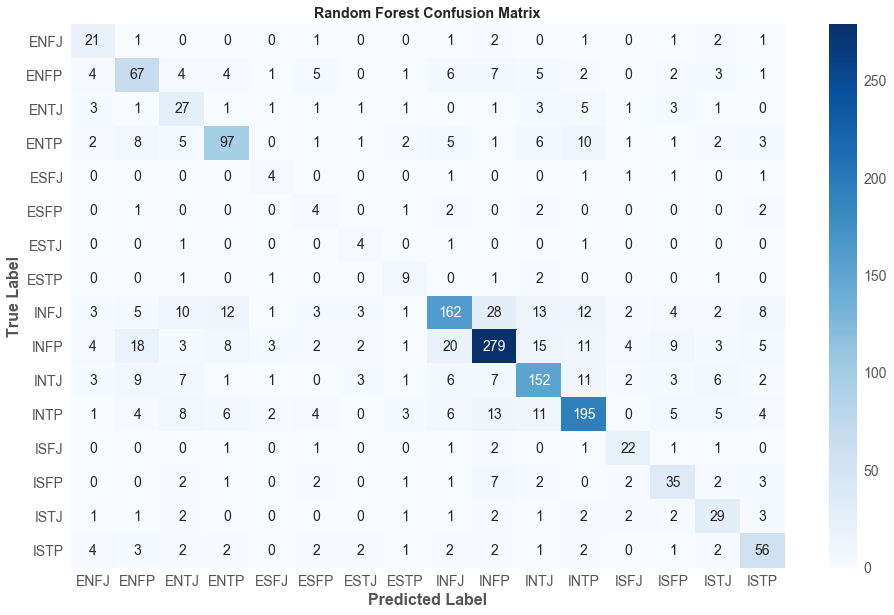

In [87]:
rf_conf_mat = confusion_matrix(y_test,y_pred_rf_CV)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Random Forest Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')

## LinearSVM with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [88]:
ln_SVM_CV = LinearSVC(random_state=0)
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.519884726225


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [89]:
parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

linear_SVM_CV = LinearSVC(random_state=0, class_weight='balanced')
ln_SVM_CV = GridSearchCV(estimator=linear_SVM_CV, param_grid=parameters, cv=5)

In [90]:
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)

In [91]:
print (classification_report(y_test, y_pred_SVM_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

       ENFJ       0.48      0.68      0.56        31
       ENFP       0.55      0.60      0.58       112
       ENTJ       0.50      0.54      0.52        50
       ENTP       0.79      0.68      0.73       145
       ESFJ       0.22      0.44      0.30         9
       ESFP       0.20      0.25      0.22        12
       ESTJ       0.33      0.57      0.42         7
       ESTP       0.25      0.53      0.34        15
       INFJ       0.79      0.60      0.68       269
       INFP       0.75      0.79      0.77       387
       INTJ       0.68      0.69      0.68       214
       INTP       0.76      0.74      0.75       267
       ISFJ       0.67      0.73      0.70        30
       ISFP       0.73      0.57      0.64        58
       ISTJ       0.58      0.70      0.63        47
       ISTP       0.68      0.79      0.73        82

avg / total       0.71      0.69      0.69      1735

___________________________________________

In [92]:
ln_SVM_CV.best_params_

{'C': 1e-05}

## ADABOOST with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [93]:
ada_boost_CV = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_CV.fit(count_vect_train, y_train)
y_pred_ada_CV = ada_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_CV))

Accuracy : 0.47492795389


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [94]:
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 25, 50, 100]}

DTC = DecisionTreeClassifier(class_weight='balanced',  random_state = 0, max_depth = None)
ada_boost_CV = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")
ada_boost_CV_g = GridSearchCV(estimator=ada_boost_CV, param_grid=parameters, cv=5)

In [95]:
ada_boost_CV_g.fit(count_vect_train, y_train)
y_pred_ada_boost_CV = ada_boost_CV_g.predict(count_vect_test)

In [96]:
print (classification_report(y_test, y_pred_ada_boost_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_boost_CV))

             precision    recall  f1-score   support

       ENFJ       0.19      0.23      0.21        31
       ENFP       0.38      0.37      0.37       112
       ENTJ       0.33      0.30      0.31        50
       ENTP       0.48      0.48      0.48       145
       ESFJ       0.33      0.22      0.27         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.50      0.29      0.36         7
       ESTP       0.13      0.13      0.13        15
       INFJ       0.45      0.40      0.42       269
       INFP       0.51      0.55      0.53       387
       INTJ       0.48      0.57      0.52       214
       INTP       0.54      0.49      0.52       267
       ISFJ       0.31      0.43      0.36        30
       ISFP       0.40      0.31      0.35        58
       ISTJ       0.50      0.45      0.47        47
       ISTP       0.55      0.59      0.56        82

avg / total       0.47      0.47      0.47      1735

___________________________________________

In [97]:
ada_boost_CV_g.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 10}

## XGBOOST with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [98]:
xgboost_CV = xgb.XGBClassifier()
xgboost_CV.fit(count_vect_train, y_train)
y_pred_xgb = xgboost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy : 0.687031700288


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

parameters = {"n_estimators": [50,100, 150, 200],
             'learning_rate':np.linspace(1e-16, 1, 3)}

xgb_CV = xgb.XGBClassifier()
xgb_CV_g = GridSearchCV(estimator=xgb_CV, param_grid=parameters, cv=5)

xgb_CV_g.fit(count_vect_train, y_train)
y_pred_xgb_CV_g = xgb_CV_g.predict(count_vect_test)
print (classification_report(y_test, y_pred_xgb_CV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb_CV_g))

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> PREDICTIONS WITH TF-IDF VECTORIZING

## Logistic Regression with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [99]:
logreg_TV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)

In [100]:
print (classification_report(y_test, y_pred_lr_TV))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))

             precision    recall  f1-score   support

       ENFJ       0.61      0.65      0.62        31
       ENFP       0.57      0.60      0.59       112
       ENTJ       0.55      0.60      0.57        50
       ENTP       0.74      0.68      0.71       145
       ESFJ       0.67      0.44      0.53         9
       ESFP       0.14      0.25      0.18        12
       ESTJ       0.57      0.57      0.57         7
       ESTP       0.29      0.47      0.36        15
       INFJ       0.77      0.59      0.67       269
       INFP       0.74      0.76      0.75       387
       INTJ       0.68      0.69      0.68       214
       INTP       0.75      0.79      0.77       267
       ISFJ       0.65      0.73      0.69        30
       ISFP       0.70      0.60      0.65        58
       ISTJ       0.65      0.70      0.67        47
       ISTP       0.69      0.80      0.74        82

avg / total       0.70      0.69      0.69      1735

-------------------------------------------

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [101]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1, 10, 100, 500, 1000]}

lr_classifierTV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV = GridSearchCV(estimator=lr_classifierTV, param_grid=parameters, cv=5)

In [102]:
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)

In [103]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))

Accuracy : 0.693371757925


In [104]:
logreg_TV.best_params_

{'C': 1, 'penalty': 'l2'}

## Random Forest with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [105]:
rf_TV = RandomForestClassifier(random_state=0)
rf_TV.fit(tfidf_vect_train, y_train)
y_pred_rf_TV = rf_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_TV))

Accuracy : 0.339481268012


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [106]:
parameters = {'n_estimators':[1000, 1500, 2000, 2500]}

rand_forest_TV_g = RandomForestClassifier(random_state=0)
rf_TV_g = GridSearchCV(estimator=rand_forest_TV_g, param_grid=parameters, cv=5)

In [107]:
rf_TV_g.fit(tfidf_vect_train, y_train)
y_pred_rf_TV_g = rf_TV_g.predict(tfidf_vect_test)

In [108]:
print (classification_report(y_test, y_pred_rf_TV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_TV_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.66      0.26      0.37       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.79      0.40      0.53       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.56      0.62      0.59       269
       INFP       0.44      0.89      0.59       387
       INTJ       0.69      0.60      0.65       214
       INTP       0.59      0.75      0.66       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.50      0.02      0.04        47
       ISTP       0.90      0.11      0.20        82

avg / total       0.53      0.54      0.48      1735

___________________________________________

## LinearSVM with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [109]:
ln_SVM_TV = LinearSVC(random_state=0)
ln_SVM_TV.fit(tfidf_vect_train, y_train)
y_pred_SVM_TV = ln_SVM_CV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_TV))

Accuracy : 0.660518731988


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [110]:
parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

linear_SVM_TV_g = LinearSVC(random_state=0, class_weight='balanced')
ln_SVM_TV_g = GridSearchCV(estimator=linear_SVM_TV_g, param_grid=parameters, cv=5)

In [111]:
ln_SVM_TV_g.fit(tfidf_vect_train, y_train)
y_pred_SVM_TV_g = ln_SVM_TV_g.predict(tfidf_vect_test)

In [112]:
print (classification_report(y_test, y_pred_SVM_TV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_TV_g))

             precision    recall  f1-score   support

       ENFJ       0.49      0.68      0.57        31
       ENFP       0.57      0.62      0.59       112
       ENTJ       0.49      0.62      0.55        50
       ENTP       0.76      0.69      0.72       145
       ESFJ       0.31      0.44      0.36         9
       ESFP       0.11      0.25      0.15        12
       ESTJ       0.40      0.57      0.47         7
       ESTP       0.21      0.47      0.29        15
       INFJ       0.78      0.59      0.67       269
       INFP       0.79      0.73      0.76       387
       INTJ       0.70      0.66      0.68       214
       INTP       0.76      0.74      0.75       267
       ISFJ       0.55      0.77      0.64        30
       ISFP       0.66      0.60      0.63        58
       ISTJ       0.53      0.70      0.61        47
       ISTP       0.62      0.80      0.70        82

avg / total       0.70      0.68      0.69      1735

___________________________________________

In [113]:
ln_SVM_TV_g.best_params_

{'C': 0.1}

## ADABOOST with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [114]:
ada_boost_TV = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R")
ada_boost_TV.fit(tfidf_vect_train, y_train)
y_pred_ada_TV = ada_boost_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_TV))

Accuracy : 0.46916426513


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [115]:
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 25, 50, 100]}

DTC = DecisionTreeClassifier(class_weight='balanced',  random_state = 0, max_depth = None)
ada_boost_TV = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")
ada_boost_TV_g = GridSearchCV(estimator=ada_boost_TV, param_grid=parameters, cv=5)

In [116]:
ada_boost_TV_g.fit(tfidf_vect_train, y_train)
y_pred_ada_boost_TV_g = ada_boost_TV_g.predict(tfidf_vect_test)

In [117]:
print (classification_report(y_test, y_pred_ada_boost_TV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_boost_TV_g))

             precision    recall  f1-score   support

       ENFJ       0.31      0.42      0.36        31
       ENFP       0.33      0.36      0.34       112
       ENTJ       0.27      0.28      0.28        50
       ENTP       0.58      0.46      0.52       145
       ESFJ       0.60      0.33      0.43         9
       ESFP       0.11      0.08      0.10        12
       ESTJ       0.14      0.14      0.14         7
       ESTP       0.09      0.13      0.11        15
       INFJ       0.46      0.46      0.46       269
       INFP       0.54      0.56      0.55       387
       INTJ       0.45      0.48      0.46       214
       INTP       0.51      0.49      0.50       267
       ISFJ       0.38      0.47      0.42        30
       ISFP       0.34      0.26      0.29        58
       ISTJ       0.31      0.36      0.34        47
       ISTP       0.58      0.50      0.54        82

avg / total       0.47      0.46      0.46      1735

___________________________________________

## XGBOOST with Tf-Idf Vectorizing

In [118]:
xgboost_TV = xgb.XGBClassifier()
xgboost_TV.fit(tfidf_vect_train, y_train)
y_pred_xgb_TV = xgboost_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb_TV))

Accuracy : 0.688760806916


# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-2: PREDICTIONS BY REMOVING MBTI LABELS FROM TEXT

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;">PREDICTIONS WITH COUNTVECTORIZING

## Logistic Regression with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [119]:
logreg_CV_1 = LogisticRegression(random_state=0)
logreg_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_lr_CV_1 = logreg_CV_1.predict(count_vect_test_1)

In [120]:
print (classification_report(y_test_1, y_pred_lr_CV_1))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_CV_1))

             precision    recall  f1-score   support

       ENFJ       0.12      0.06      0.08        31
       ENFP       0.22      0.28      0.25       112
       ENTJ       0.05      0.02      0.03        50
       ENTP       0.30      0.28      0.29       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.35      0.43      0.38       269
       INFP       0.46      0.51      0.48       387
       INTJ       0.29      0.31      0.30       214
       INTP       0.37      0.42      0.39       267
       ISFJ       0.24      0.17      0.20        30
       ISFP       0.18      0.09      0.12        58
       ISTJ       0.37      0.15      0.21        47
       ISTP       0.39      0.27      0.32        82

avg / total       0.33      0.35      0.33      1735

-------------------------------------------

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [189]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1, 10, 100, 500, 1000]}

lr_classifierCV_1_g = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_g = GridSearchCV(estimator=lr_classifierCV_1_g, param_grid=parameters, cv=5)

In [199]:
logreg_CV_1_g.fit(count_vect_train_1, y_train_1)
y_pred_lr_CV_1_g = logreg_CV_1_g.predict(count_vect_test_1)

In [200]:
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_CV_1_g))

Accuracy : 0.365994236311


## Random Forest with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [121]:
rf_CV_1 = RandomForestClassifier(random_state=0)
rf_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_rf_CV_1 = rf_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_CV_1))

Accuracy : 0.221902017291


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [196]:
parameters = {'n_estimators':[1000, 1500, 2000, 2500]}

rand_forest_CV_1_g = RandomForestClassifier(random_state=0)
rf_CV_1_g = GridSearchCV(estimator=rand_forest_CV_1_g, param_grid=parameters, cv=5)

In [197]:
rf_CV_1_g.fit(count_vect_train_1, y_train_1)
y_pred_rf_CV_1_g = rf_CV_1_g.predict(count_vect_test_1)

In [198]:
print (classification_report(y_test_1, y_pred_rf_CV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_CV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.00      0.00      0.00       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.00      0.00      0.00       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.28      0.32      0.30       269
       INFP       0.29      0.85      0.44       387
       INTJ       0.52      0.08      0.14       214
       INTP       0.34      0.35      0.34       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.00      0.00      0.00        47
       ISTP       0.00      0.00      0.00        82

avg / total       0.22      0.30      0.21      1735

___________________________________________

## LinearSVM with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [122]:
ln_SVM_CV_1 = LinearSVC(random_state=0)
ln_SVM_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_SVM_CV_1 = ln_SVM_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_CV_1))

Accuracy : 0.315273775216


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [201]:
parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

linear_SVM_CV_1_g = LinearSVC(random_state=0, class_weight='balanced')
ln_SVM_CV_1_g = GridSearchCV(estimator=linear_SVM_CV_1_g, param_grid=parameters, cv=5)

In [202]:
ln_SVM_CV_1_g.fit(count_vect_train_1, y_train_1)
y_pred_SVM_CV_1_g = ln_SVM_CV_1_g.predict(count_vect_test_1)

In [203]:
print (classification_report(y_test_1, y_pred_SVM_CV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_CV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.06      0.13      0.08        31
       ENFP       0.19      0.24      0.22       112
       ENTJ       0.11      0.12      0.12        50
       ENTP       0.31      0.28      0.30       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.20      0.14      0.17         7
       ESTP       0.03      0.07      0.04        15
       INFJ       0.41      0.33      0.36       269
       INFP       0.52      0.44      0.48       387
       INTJ       0.36      0.31      0.33       214
       INTP       0.46      0.46      0.46       267
       ISFJ       0.16      0.40      0.23        30
       ISFP       0.18      0.22      0.20        58
       ISTJ       0.24      0.28      0.25        47
       ISTP       0.29      0.37      0.32        82

avg / total       0.37      0.34      0.35      1735

___________________________________________

## ADABOOST with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [123]:
ada_boost_CV_1 = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_ada_CV_1 = ada_boost_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_CV_1))

Accuracy : 0.15734870317


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [204]:
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 25, 50, 100]}

DTC = DecisionTreeClassifier(class_weight='balanced',  random_state = 0, max_depth = None)
ada_boost_CV_1_g = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")
ada_boost_CV_1_g = GridSearchCV(estimator=ada_boost_CV_1_g, param_grid=parameters, cv=5)

In [205]:
ada_boost_CV_1_g.fit(count_vect_train_1, y_train_1)
y_pred_ada_boost_CV_1_g = ada_boost_CV_1_g.predict(count_vect_test_1)

In [206]:
print (classification_report(y_test_1, y_pred_ada_boost_CV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_boost_CV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.06      0.07      0.07       112
       ENTJ       0.03      0.02      0.02        50
       ENTP       0.09      0.08      0.08       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.07      0.07      0.07        15
       INFJ       0.22      0.24      0.23       269
       INFP       0.26      0.28      0.27       387
       INTJ       0.11      0.11      0.11       214
       INTP       0.20      0.20      0.20       267
       ISFJ       0.14      0.23      0.18        30
       ISFP       0.04      0.03      0.04        58
       ISTJ       0.24      0.17      0.20        47
       ISTP       0.12      0.10      0.11        82

avg / total       0.17      0.17      0.17      1735

___________________________________________

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> PREDICTIONS WITH TF-IDF VECTORIZING

## Logistic Regression with TF-IDF Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [124]:
logreg_TV_1 = LogisticRegression(random_state=0)
logreg_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_lr_TV_1 = logreg_TV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_TV_1))
print('--------------------------------------------------------------')
print (classification_report(y_test_1, y_pred_lr_TV_1))

Accuracy : 0.390778097983
--------------------------------------------------------------
             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.34      0.15      0.21       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.31      0.12      0.18       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.34      0.45      0.39       269
       INFP       0.42      0.72      0.53       387
       INTJ       0.35      0.35      0.35       214
       INTP       0.42      0.61      0.50       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.75      0.06      0.12        47
       ISTP       0.60      0.04      0.07        82

avg / to

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [193]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1, 10, 100, 500, 1000]}

lr_classifierTV_1_g = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_g = GridSearchCV(estimator=lr_classifierTV_1_g, param_grid=parameters, cv=5)

In [194]:
logreg_TV_1_g.fit(tfidf_vect_train_1, y_train_1)
y_pred_lr_TV_1_g = logreg_TV_1_g.predict(tfidf_vect_test_1)

In [195]:
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_TV_1_g))

Accuracy : 0.38386167147


## Random Forest with TF-IDF Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [125]:
rf_TV_1 = RandomForestClassifier(random_state=0)
rf_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_rf_TV_1 = rf_CV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_TV_1))

Accuracy : 0.223054755043


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [207]:
parameters = {'n_estimators':[1000, 1500, 2000, 2500]}

rand_forest_TV_1_g = RandomForestClassifier(random_state=0)
rf_TV_1_g = GridSearchCV(estimator=rand_forest_TV_1_g, param_grid=parameters, cv=5)

In [208]:
rf_TV_1_g.fit(tfidf_vect_train_1, y_train_1)
y_pred_rf_TV_1_g = rf_TV_1_g.predict(tfidf_vect_test_1)

In [209]:
print (classification_report(y_test_1, y_pred_rf_TV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_TV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.00      0.00      0.00       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.00      0.00      0.00       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.31      0.33      0.32       269
       INFP       0.29      0.86      0.44       387
       INTJ       0.44      0.06      0.10       214
       INTP       0.36      0.39      0.37       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.00      0.00      0.00        47
       ISTP       0.00      0.00      0.00        82

avg / total       0.22      0.31      0.22      1735

___________________________________________

## LinearSVM with TF-IDF Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [246]:
ln_SVM_TV_1 = LinearSVC(random_state=0)
ln_SVM_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_SVM_TV_1 = ln_SVM_TV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_TV_1))

Accuracy : 0.382132564841


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [210]:
parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

linear_SVM_TV_1_g = LinearSVC(random_state=0, class_weight='balanced')
ln_SVM_TV_1_g = GridSearchCV(estimator=linear_SVM_TV_1_g, param_grid=parameters, cv=5)

In [211]:
ln_SVM_TV_1_g.fit(tfidf_vect_train_1, y_train_1)
y_pred_SVM_TV_1_g = ln_SVM_TV_1_g.predict(tfidf_vect_test_1)

In [212]:
print (classification_report(y_test_1, y_pred_SVM_TV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_TV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.10      0.16      0.12        31
       ENFP       0.20      0.25      0.22       112
       ENTJ       0.11      0.10      0.11        50
       ENTP       0.27      0.28      0.27       145
       ESFJ       0.25      0.11      0.15         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.33      0.14      0.20         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.42      0.37      0.39       269
       INFP       0.51      0.46      0.49       387
       INTJ       0.33      0.34      0.33       214
       INTP       0.45      0.43      0.44       267
       ISFJ       0.18      0.30      0.23        30
       ISFP       0.18      0.19      0.19        58
       ISTJ       0.27      0.30      0.28        47
       ISTP       0.32      0.39      0.35        82

avg / total       0.36      0.35      0.36      1735

___________________________________________

## ADABOOST with TF-IDF Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [128]:
ada_boost_TV_1 = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_ada_TV_1 = ada_boost_CV_1.predict(tfidf_vect_test_1)

In [129]:
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_TV_1))

Accuracy : 0.223054755043


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [213]:
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 25, 50, 100]}

DTC = DecisionTreeClassifier(class_weight='balanced',  random_state = 0, max_depth = None)
ada_boost_TV_1_g = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")
ada_boost_TV_1_g = GridSearchCV(estimator=ada_boost_TV_1_g, param_grid=parameters, cv=5)

In [214]:
ada_boost_TV_1_g.fit(tfidf_vect_train_1, y_train_1)
y_pred_ada_boost_TV_1_g = ada_boost_TV_1_g.predict(tfidf_vect_test_1)

In [215]:
print (classification_report(y_test_1, y_pred_ada_boost_TV_1_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_boost_TV_1_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.09      0.10      0.10       112
       ENTJ       0.03      0.02      0.02        50
       ENTP       0.06      0.05      0.05       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.21      0.26      0.23       269
       INFP       0.27      0.29      0.28       387
       INTJ       0.12      0.12      0.12       214
       INTP       0.17      0.16      0.17       267
       ISFJ       0.12      0.10      0.11        30
       ISFP       0.04      0.03      0.04        58
       ISTJ       0.17      0.15      0.16        47
       ISTP       0.11      0.09      0.10        82

avg / total       0.16      0.17      0.16      1735

___________________________________________

## XGBOOST with CountVectorizing


In [250]:
xgboost_CV_1 = xgb.XGBClassifier()
xgboost_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_xgb_CV_1 = xgboost_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_xgb_CV_1))

Accuracy : 0.369452449568


## XGBOOST with Tf-Idf Vectorizing

In [247]:
xgboost_TV_1 = xgb.XGBClassifier()
xgboost_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_xgb_TV_1 = xgboost_TV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_xgb_TV_1))

Accuracy : 0.353890489914


# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-3: PREDICTIONS WITHOUT REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intoversion vs. Extroversion

In [130]:
X_train, X_test, y_train_IE, y_test_IE = train_test_split(df_2['clean_text'], df_2['IE'], test_size=0.2, random_state=33)

In [131]:
df_2['IE'].value_counts()

1    6676
0    1999
Name: IE, dtype: int64

In [132]:
balance_ratio = 6676/(6676+1999) 

## Logistic Regression with CountVectorizing for Introversion vs Extroversion

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [133]:
logreg_CV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_IE.fit(count_vect_train, y_train_IE)
y_pred_lr_CV_IE = logreg_CV_IE.predict(count_vect_test)

In [134]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_CV_IE))

Accuracy : 0.795965417867


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [135]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g_IE = GridSearchCV(estimator=lr_classifierCV_IE, param_grid=parameters, cv=5)

In [136]:
logreg_CV_g_IE.fit(count_vect_train, y_train_IE)
y_pred_lr_CV_g_IE = logreg_CV_g_IE.predict(count_vect_test)

In [137]:
print (classification_report(y_test_IE, y_pred_lr_CV_g_IE))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_CV_g_IE))

             precision    recall  f1-score   support

          0       0.63      0.76      0.69       381
          1       0.93      0.87      0.90      1354

avg / total       0.86      0.85      0.85      1735

_____________________________________________
Accuracy : 0.849567723343


In [138]:
logreg_CV_g_IE.best_params_

{'C': 0.05, 'penalty': 'l1'}

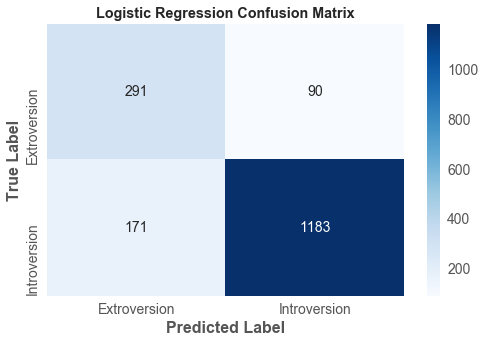

In [139]:
logreg_conf_mat = confusion_matrix(y_test_IE,y_pred_lr_CV_g_IE)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Extroversion', 'Introversion'], yticklabels=['Extroversion', 'Introversion'])
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## XGBOOST with CountVectorizing for Introversion vs Extroversion

In [289]:
xgboost_CV_IE = xgb.XGBClassifier()
xgboost_CV_IE.fit(count_vect_train, y_train_IE)
y_pred_xgb_CV_IE = xgboost_CV_1_IE.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_xgb_CV_IE))

Accuracy : 0.780403458213


## Logistic Regression with Tf-Idf Vectorizing for Introversion vs Extroversion

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [140]:
logreg_TV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_lr_TV_IE = logreg_CV_IE.predict(tfidf_vect_test)

In [141]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_TV_IE))

Accuracy : 0.780979827089


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [142]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierTV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_g_IE = GridSearchCV(estimator=lr_classifierTV_IE, param_grid=parameters, cv=5)

In [143]:
logreg_TV_g_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_lr_TV_g_IE = logreg_TV_g_IE.predict(tfidf_vect_test)

In [144]:
print (classification_report(y_test_IE, y_pred_lr_TV_g_IE))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_TV_g_IE))

             precision    recall  f1-score   support

          0       0.63      0.76      0.69       381
          1       0.93      0.88      0.90      1354

avg / total       0.86      0.85      0.86      1735

_____________________________________________
Accuracy : 0.851296829971


In [145]:
logreg_TV_g_IE.best_params_

{'C': 0.5, 'penalty': 'l1'}

## LinearSVM with Tf-Idf Vectorizing for Introversion vs Extroversion

In [248]:
ln_SVM_TV_IE = LinearSVC(random_state=0)
ln_SVM_TV_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_SVM_TV_IE = ln_SVM_TV_IE.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_SVM_TV_IE))

Accuracy : 0.850144092219


## XGBOOST with Tf-Idf Vectorizing for Introversion vs Extroversion

In [279]:
xgboost_TV_IE = xgb.XGBClassifier()
xgboost_TV_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_xgb_TV_IE = xgboost_TV_IE.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_xgb_TV_IE))

Accuracy : 0.85878962536


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intuition vs. Sensing

In [146]:
X_train, X_test, y_train_NS, y_test_NS = train_test_split(df_2['clean_text'], df_2['NS'], test_size=0.2, random_state=33)

In [147]:
df_2.NS.value_counts()

1    7478
0    1197
Name: NS, dtype: int64

## Logistic Regression with CountVectorizing for Intuition vs Sensing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [148]:
logreg_CV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_NS.fit(count_vect_train, y_train_NS)
y_pred_lr_CV_NS = logreg_CV_NS.predict(count_vect_test)

In [149]:
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_CV_NS))

Accuracy : 0.857636887608


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [218]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g_NS = GridSearchCV(estimator=lr_classifierCV_NS, param_grid=parameters, cv=5)

In [219]:
logreg_CV_g_NS.fit(count_vect_train, y_train_NS)
y_pred_lr_CV_g_NS = logreg_CV_g_NS.predict(count_vect_test)

In [251]:
print (classification_report(y_test_NS, y_pred_lr_CV_g_NS))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_CV_g_NS))

             precision    recall  f1-score   support

          0       0.54      0.61      0.58       260
          1       0.93      0.91      0.92      1475

avg / total       0.87      0.86      0.87      1735

_____________________________________________
Accuracy : 0.864553314121


## XGBOOST with CountVectorizing for Intuition vs Sensing

In [290]:
xgboost_CV_NS = xgb.XGBClassifier()
xgboost_CV_NS.fit(count_vect_train, y_train_NS)
y_pred_xgb_CV_NS = xgboost_CV_1_NS.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_xgb_CV_NS))

Accuracy : 0.710086455331


## Logistic Regression with Tf-Idf Vectorizing for Intuition vs Sensing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [150]:
logreg_TV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_NS.fit(tfidf_vect_train, y_train_NS)
y_pred_lr_TV_NS = logreg_TV_NS.predict(tfidf_vect_test)

In [151]:
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_TV_NS))

Accuracy : 0.876080691643


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [221]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierTV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_g_NS = GridSearchCV(estimator=lr_classifierTV_NS, param_grid=parameters, cv=5)

In [222]:
logreg_TV_g_NS.fit(tfidf_vect_train, y_train_NS)
y_pred_lr_TV_g_NS = logreg_TV_g_NS.predict(tfidf_vect_test)

In [252]:
print (classification_report(y_test_NS, y_pred_lr_TV_g_NS))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_TV_g_NS))

             precision    recall  f1-score   support

          0       0.57      0.68      0.62       260
          1       0.94      0.91      0.93      1475

avg / total       0.89      0.88      0.88      1735

_____________________________________________
Accuracy : 0.875504322767


## LinearSVM with Tf-Idf Vectorizing for Intuition vs Sensing

In [254]:
ln_SVM_TV_NS = LinearSVC(random_state=0)
ln_SVM_TV_NS.fit(tfidf_vect_train, y_train_NS)
y_pred_SVM_TV_NS = ln_SVM_TV_NS.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_SVM_TV_NS))

Accuracy : 0.893371757925


## XGBOOST with Tf-Idf Vectorizing for Intuition vs Sensing

In [271]:
xgboost_TV_NS = xgb.XGBClassifier()
xgboost_TV_NS.fit(tfidf_vect_train, y_train_NS)
y_pred_xgb_TV_NS = xgboost_TV_NS.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_xgb_TV_NS))

Accuracy : 0.892219020173


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Thinking vs. Feeling

In [152]:
X_train, X_test, y_train_TF, y_test_TF = train_test_split(df_2['clean_text'], df_2['TF'], test_size=0.2, random_state=33)

In [153]:
df_2.TF.value_counts()

0    4694
1    3981
Name: TF, dtype: int64

## Logistic Regression with CountVectorizing for Thinking vs Feeling

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [154]:
logreg_CV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_TF.fit(count_vect_train, y_train_TF)
y_pred_lr_CV_TF = logreg_CV_TF.predict(count_vect_test)

In [155]:
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_CV_TF))

Accuracy : 0.782132564841


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [242]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g_TF = GridSearchCV(estimator=lr_classifierCV_TF, param_grid=parameters, cv=5)

In [243]:
logreg_CV_g_TF.fit(count_vect_train, y_train_TF)
y_pred_lr_CV_g_TF = logreg_CV_g_TF.predict(count_vect_test)

In [244]:
print (classification_report(y_test_TF, y_pred_lr_CV_g_TF))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_CV_g_TF))

             precision    recall  f1-score   support

          0       0.88      0.83      0.85       908
          1       0.83      0.87      0.85       827

avg / total       0.85      0.85      0.85      1735

_____________________________________________
Accuracy : 0.850720461095


## Logistic Regression with Tf-Idf Vectorizing for Thinking vs Feeling

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [156]:
logreg_TV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_TF.fit(tfidf_vect_train, y_train_TF)
y_pred_lr_TV_TF = logreg_TV_TF.predict(tfidf_vect_test)

In [157]:
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_TV_TF))

Accuracy : 0.848991354467


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [238]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierTV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_g_TF = GridSearchCV(estimator=lr_classifierTV_TF, param_grid=parameters, cv=5)

In [239]:
logreg_TV_g_TF.fit(tfidf_vect_train, y_train_TF)
y_pred_lr_TV_g_TF = logreg_TV_g_TF.predict(tfidf_vect_test)

In [240]:
print (classification_report(y_test_TF, y_pred_lr_TV_g_TF))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_TV_g_TF))

             precision    recall  f1-score   support

          0       0.88      0.82      0.85       908
          1       0.82      0.88      0.85       827

avg / total       0.85      0.85      0.85      1735

_____________________________________________
Accuracy : 0.848991354467


## LinearSVM with Tf-Idf Vectorizing for Thinking vs Feeling

In [258]:
ln_SVM_TV_TF = LinearSVC(random_state=0)
ln_SVM_TV_TF.fit(tfidf_vect_train, y_train_TF)
y_pred_SVM_TV_TF = ln_SVM_TV_TF.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_SVM_TV_TF))

Accuracy : 0.8265129683


## XGBOOST with Tf-Idf Vectorizing for Thinking vs Feeeling

In [272]:
xgboost_TV_TF = xgb.XGBClassifier()
xgboost_TV_TF.fit(tfidf_vect_train, y_train_TF)
y_pred_xgb_TV_TF = xgboost_TV_TF.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_xgb_TV_TF))

Accuracy : 0.831700288184


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Judging vs. Perceiving

In [158]:
X_train, X_test, y_train_JP, y_test_JP = train_test_split(df_2['clean_text'], df_2['JP'], test_size=0.2, random_state=33)

In [159]:
df_2.JP.value_counts()

0    5241
1    3434
Name: JP, dtype: int64

In [160]:
5241/(5241+3434)

0.604149855907781

## Logistic Regression with CountVectorizing for Judging vs Perceiving

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [161]:
logreg_CV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_JP.fit(count_vect_train, y_train_JP)
y_pred_lr_CV_JP = logreg_CV_JP.predict(count_vect_test)

In [162]:
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_CV_JP))

Accuracy : 0.711239193084


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [232]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g_JP = GridSearchCV(estimator=lr_classifierCV_JP, param_grid=parameters, cv=5)

In [233]:
logreg_CV_g_JP.fit(count_vect_train, y_train_JP)
y_pred_lr_CV_g_JP = logreg_CV_g_JP.predict(count_vect_test)

In [234]:
print (classification_report(y_test_JP, y_pred_lr_CV_g_JP))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_CV_g_JP))

             precision    recall  f1-score   support

          0       0.85      0.80      0.83      1078
          1       0.70      0.78      0.74       657

avg / total       0.80      0.79      0.79      1735

_____________________________________________
Accuracy : 0.790201729107


## Logistic Regression with Tf-Idf Vectorizing for Judging vs Perceiving

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [280]:
logreg_TV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_JP.fit(tfidf_vect_train, y_train_JP)
y_pred_lr_TV_JP = logreg_TV_JP.predict(tfidf_vect_test)

In [281]:
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_TV_JP))

Accuracy : 0.798847262248


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [255]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierTV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_g_JP = GridSearchCV(estimator=lr_classifierTV_JP, param_grid=parameters, cv=5)

In [256]:
logreg_TV_g_JP.fit(tfidf_vect_train, y_train_JP)
y_pred_lr_TV_g_JP = logreg_TV_g_JP.predict(tfidf_vect_test)

In [257]:
print (classification_report(y_test_JP, y_pred_lr_TV_g_JP))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_TV_g_JP))

             precision    recall  f1-score   support

          0       0.86      0.81      0.83      1078
          1       0.71      0.78      0.75       657

avg / total       0.80      0.80      0.80      1735

_____________________________________________
Accuracy : 0.798270893372


## LinearSVM with Tf-Idf Vectorizing for Judging vs Perceiving

In [259]:
ln_SVM_TV_JP = LinearSVC(random_state=0)
ln_SVM_TV_JP.fit(tfidf_vect_train, y_train_JP)
y_pred_SVM_TV_JP = ln_SVM_TV_JP.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_SVM_TV_JP))

Accuracy : 0.767146974063


## XGBOOST with Tf-Idf Vectorizing for Judging vs Perceiving

In [273]:
xgboost_TV_JP = xgb.XGBClassifier()
xgboost_TV_JP.fit(tfidf_vect_train, y_train_JP)
y_pred_xgb_TV_JP = xgboost_TV_JP.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_xgb_TV_JP))

Accuracy : 0.805187319885


# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-4: PREDICTIONS BY REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intoversion vs. Extroversion

In [165]:
X_train_1, X_test_1, y_train_1_IE, y_test_1_IE = train_test_split(df_2['clean_text_without_mbti'], df_2['IE'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Introversion vs Extroversion

In [166]:
logreg_CV_1_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_IE.fit(count_vect_train_1, y_train_1_IE)
y_pred_lr_CV_1_IE = logreg_CV_1_IE.predict(count_vect_test_1)

In [167]:
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_lr_CV_1_IE))

Accuracy : 0.708357348703


## XGBOOST with CountVectorizing for Introversion vs Extroversion

In [288]:
xgboost_CV_1_IE = xgb.XGBClassifier()
xgboost_CV_1_IE.fit(count_vect_train_1, y_train_1_IE)
y_pred_xgb_CV_1_IE = xgboost_CV_1_IE.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_xgb_CV_1_IE))

Accuracy : 0.785014409222


## Logistic Regression with Tf-Idf Vectorizing for Introversion vs Extroversion

In [168]:
logreg_TV_1_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_IE.fit(tfidf_vect_train_1, y_train_1_IE)
y_pred_lr_TV_1_IE = logreg_TV_1_IE.predict(tfidf_vect_test_1)

In [169]:
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_lr_TV_1_IE))

Accuracy : 0.745244956772


## LinearSVM with Tf-Idf Vectorizing for Introversion vs Extroversion

In [260]:
ln_SVM_TV_1_IE = LinearSVC(random_state=0)
ln_SVM_TV_1_IE.fit(tfidf_vect_train_1, y_train_1_IE)
y_pred_SVM_TV_1_IE = ln_SVM_TV_1_IE.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_SVM_TV_1_IE))

Accuracy : 0.785590778098


## XGBOOST with Tf-Idf Vectorizing for Introversion vs Extroversion

In [274]:
xgboost_TV_1_IE = xgb.XGBClassifier()
xgboost_TV_1_IE.fit(tfidf_vect_train_1, y_train_1_IE)
y_pred_xgb_TV_1_IE = xgboost_TV_1_IE.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_xgb_TV_1_IE))

Accuracy : 0.782132564841


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intuition vs. Sensing

In [170]:
X_train_1, X_test_1, y_train_1_NS, y_test_1_NS = train_test_split(df_2['clean_text_without_mbti'], df_2['NS'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Intuition vs Sensing

In [171]:
logreg_CV_1_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_NS.fit(count_vect_train_1, y_train_1_NS)
y_pred_lr_CV_1_NS = logreg_CV_1_NS.predict(count_vect_test_1)

In [172]:
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_lr_CV_1_NS))

Accuracy : 0.780403458213


## XGBOOST with CountVectorizing for Intuition vs Sensing

In [287]:
xgboost_CV_1_NS = xgb.XGBClassifier()
xgboost_CV_1_NS.fit(count_vect_train_1, y_train_1_NS)
y_pred_xgb_CV_1_NS = xgboost_CV_1_NS.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_xgb_CV_1_NS))

Accuracy : 0.851296829971


## Logistic Regression with Tf-Idf Vectorizing for Intuition vs Sensing

In [173]:
logreg_TV_1_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_NS.fit(tfidf_vect_train_1, y_train_1_NS)
y_pred_lr_TV_1_NS = logreg_TV_1_NS.predict(tfidf_vect_test_1)

In [174]:
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_lr_TV_1_NS))

Accuracy : 0.78386167147


## LinearSVM with Tf-Idf Vectorizing for Intuition vs Sensing

In [268]:
ln_SVM_TV_1_NS = LinearSVC(random_state=0)
ln_SVM_TV_1_NS.fit(tfidf_vect_train_1, y_train_1_NS)
y_pred_SVM_TV_1_NS = ln_SVM_TV_1_NS.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_SVM_TV_1_NS))

Accuracy : 0.848991354467


## XGBOOST with Tf-Idf Vectorizing for Intuition vs Sensing

In [275]:
xgboost_TV_1_NS = xgb.XGBClassifier()
xgboost_TV_1_NS.fit(tfidf_vect_train_1, y_train_1_NS)
y_pred_xgb_TV_1_NS = xgboost_TV_1_NS.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_xgb_TV_1_NS))

Accuracy : 0.848414985591


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Thinking vs. Feeling

In [175]:
X_train_1, X_test_1, y_train_1_TF, y_test_1_TF = train_test_split(df_2['clean_text_without_mbti'], df_2['TF'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Thinking vs Feeling

In [176]:
logreg_CV_1_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_TF.fit(count_vect_train_1, y_train_1_TF)
y_pred_lr_CV_1_TF = logreg_CV_1_TF.predict(count_vect_test_1)

In [177]:
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_lr_CV_1_TF))

Accuracy : 0.718731988473


## XGBOOST with CountVectorizing for Thinking vs Feeling

In [283]:
xgboost_CV_1_TF = xgb.XGBClassifier()
xgboost_CV_1_TF.fit(count_vect_train_1, y_train_1_TF)
y_pred_xgb_CV_1_TF = xgboost_CV_1_TF.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_xgb_CV_1_TF))

Accuracy : 0.736023054755


## Logistic Regression with Tf-Idf Vectorizing for Thinking vs Feeling¶

In [178]:
logreg_TV_1_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_TF.fit(tfidf_vect_train_1, y_train_1_TF)
y_pred_lr_TV_1_TF = logreg_TV_1_TF.predict(tfidf_vect_test_1)

In [179]:
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_lr_TV_1_TF))

Accuracy : 0.780403458213


## LinearSVM with Tf-Idf Vectorizing for Thinking vs Feeling

In [261]:
ln_SVM_TV_1_TF = LinearSVC(random_state=0)
ln_SVM_TV_1_TF.fit(tfidf_vect_train_1, y_train_1_TF)
y_pred_SVM_TV_1_TF = ln_SVM_TV_1_TF.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_SVM_TV_1_TF))

Accuracy : 0.752737752161


## XGBOOST with Tf-Idf Vectorizing for Thinking vs Feeling

In [276]:
xgboost_TV_1_TF = xgb.XGBClassifier()
xgboost_TV_1_TF.fit(tfidf_vect_train_1, y_train_1_TF)
y_pred_xgb_TV_1_TF = xgboost_TV_1_TF.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_xgb_TV_1_TF))

Accuracy : 0.741786743516


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Judging vs. Perceiving

In [180]:
X_train_1, X_test_1, y_train_1_JP, y_test_1_JP = train_test_split(df_2['clean_text_without_mbti'], df_2['JP'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Judging vs Perceiving¶

In [181]:
logreg_CV_1_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_JP.fit(count_vect_train_1, y_train_1_JP)
y_pred_lr_CV_1_JP = logreg_CV_1_JP.predict(count_vect_test_1)

In [182]:
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_lr_CV_1_JP))

Accuracy : 0.619596541787


## Logistic Regression with CountVectorizing for Judging vs Perceiving¶

In [183]:
logreg_TV_1_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_JP.fit(tfidf_vect_train_1, y_train_1_JP)
y_pred_lr_TV_1_JP = logreg_TV_1_JP.predict(tfidf_vect_test_1)

In [184]:
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_lr_TV_1_JP))

Accuracy : 0.665706051873


## XGBOOST with CountVectorizing for Judging vs Perceiving

In [282]:
xgboost_CV_1_JP = xgb.XGBClassifier()
xgboost_CV_1_JP.fit(count_vect_train_1, y_train_1_JP)
y_pred_xgb_CV_1_JP = xgboost_CV_1_JP.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_xgb_CV_1_JP))

Accuracy : 0.668587896254


## LinearSVM with Tf-Idf Vectorizing for Judging vs Perceiving

In [262]:
ln_SVM_TV_1_JP = LinearSVC(random_state=0)
ln_SVM_TV_1_JP.fit(tfidf_vect_train_1, y_train_1_JP)
y_pred_SVM_TV_1_JP = ln_SVM_TV_1_JP.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_SVM_TV_1_JP))

Accuracy : 0.666858789625


## XGBOOST with Tf-Idf Vectorizing for Judging vs Perceiving

In [278]:
xgboost_TV_1_JP = xgb.XGBClassifier()
xgboost_TV_1_JP.fit(tfidf_vect_train_1, y_train_1_JP)
y_pred_xgb_TV_1_JP = xgboost_TV_1_JP.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_xgb_TV_1_JP))

Accuracy : 0.677809798271


## Random Forest with CountVectorizing for Introversion vs Extroversion

In [115]:
rf_CV_IE = RandomForestClassifier(random_state=0)

In [116]:
rf_CV_IE.fit(count_vect_train_IE, y_train_IE)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
y_pred_rf_CV_IE = rf_CV_IE.predict(count_vect_test_IE)

In [122]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_rf_CV_IE))

Accuracy : 0.75734870317


## LinearSVM with CountVectorizing for Introversion vs Extroversion

In [111]:
ln_SVM_CV_IE = LinearSVC(random_state=0)
ln_SVM_CV_IE.fit(count_vect_train_IE, y_train_IE)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [112]:
y_pred_SVM_CV_IE = ln_SVM_CV_IE.predict(count_vect_test_IE)

In [114]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_SVM_CV_IE))

Accuracy : 0.733141210375


In [ ]:
logreg_CV = LogisticRegression(random_state=0)
results_rf = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)
y_pred_lr_CV = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)
print (classification_report(y_train, y_pred_lr_CV))
print ('_____________________________________________')
print ('_____________________________________________')
print ("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))
print ("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))
print ("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
results_lr = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

In [ ]:
y_pred_lr = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)

## Random Forest with CountVectorizing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_CV = RandomForestClassifier(random_state=0)

In [ ]:
results_rf = cross_validate(rf_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)
y_pred_rf = cross_val_predict(rf_CV, count_vect_train, y_train, n_jobs=-1)
print (classification_report(y_train, y_pred_lr))
print ('_____________________________________________')
print ('_____________________________________________')
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))
print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))
print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
y_pred_rf = cross_val_predict(rf_CV, count_vect_train, y_train, n_jobs=-1)

In [ ]:
print (classification_report(y_train, y_pred_lr))

## LinearSVM with CountVectorizing

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
ln_SVM_CV = LinearSVC(random_state=0)
ln.SVM_CV.fit(count_vect_train, y_train)

In [ ]:
pred2 = clf_IE2.predict(xtrain)

## Logistic Regression (CV)

In [267]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}

lr_classifierCV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV = GridSearchCV(estimator=lr_classifierCV, param_grid=parameters, cv=kfolds, scoring=scoring, refit=False)
logreg_CV.fit(count_vect_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.005, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'acc': 'accuracy', 'neg_log_loss': 'neg_log_loss', 'f1_micro': 'f1_micro'},
       verbose=0)

In [117]:
results_lr = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [118]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

CV Accuracy  : 0.3562 
CV F1        : 0.3562 
CV Logloss   : 2.1550 


In [265]:
logreg_CV.best_estimators_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimators_'

In [182]:
y_pred_lr = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)

In [184]:
print (classification_report(y_train, y_pred_lr))

             precision    recall  f1-score   support

       ENFJ       0.10      0.08      0.09       159
       ENFP       0.29      0.33      0.31       563
       ENTJ       0.17      0.14      0.15       181
       ENTP       0.26      0.26      0.26       540
       ESFJ       0.00      0.00      0.00        33
       ESFP       0.00      0.00      0.00        36
       ESTJ       0.33      0.03      0.06        32
       ESTP       0.00      0.00      0.00        74
       INFJ       0.39      0.38      0.38      1201
       INFP       0.46      0.50      0.48      1445
       INTJ       0.35      0.35      0.35       877
       INTP       0.39      0.41      0.40      1037
       ISFJ       0.11      0.10      0.10       136
       ISFP       0.13      0.12      0.12       213
       ISTJ       0.15      0.11      0.13       158
       ISTP       0.23      0.25      0.24       255

avg / total       0.34      0.34      0.34      6940



In [ ]:
"""parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}
lr = LogisticRegression(class_weight='balanced', random_state=0)               
logreg = GridSearchCV(estimator= lr, param_grid=parameters)
count_vect = CountVectorizer(min_df=0., max_df=1.)
model_lr = Pipeline([('count_vect', count_vect), ('logreg', logreg)])"""

## Naive Bayes (CV)

In [111]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierCV = MultinomialNB()
naive_bayesCV = GridSearchCV(estimator=nb_classifierCV, param_grid=parameters)

#naive_bayesCV.fit(count_vect_train, y_train)

#naive_bayesCV_pred = naive_bayesCV.predict(count_vect_test)

#metrics.accuracy_score(y_test, nb_pred)

In [112]:
#naive_bayesCV.best_estimator_

In [106]:
results_nb = cross_validate(naive_bayesCV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [107]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb['test_neg_log_loss'])))

CV Accuracy  : 0.3786 
CV F1        : 0.3786 
CV Logloss   : 10.3944 


In [115]:
"""parameters = {'alpha':[0.01, 0.1, 1]}
nb = MultinomialNB()
naive_bayes = GridSearchCV(estimator=nb, param_grid=parameters)
count_vect = CountVectorizer(min_df=0., max_df=1.)
model = Pipeline([('count_vect', count_vect), ('naive_bayes', naive_bayes)])"""

"parameters = {'alpha':[0.01, 0.1, 1]}\nnb = MultinomialNB()\nnaive_bayes = GridSearchCV(estimator=nb, param_grid=parameters)\ncount_vect = CountVectorizer(min_df=0., max_df=1.)\nmodel = Pipeline([('count_vect', count_vect), ('naive_bayes', naive_bayes)])"

## Random Forest (CV)

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
parameters = {'n_estimators':[200, 500, 750, 1000], 'max_depth':[3,5,7,]}

rf_CV = RandomForestClassifier(random_state=0)
rand_forestCV = GridSearchCV(estimator=rf_CV, param_grid=parameters)

In [121]:
#count_vect = CountVectorizer(min_df=0., max_df=1.)
#model = Pipeline([('count_vect', count_vect), ('rand_forest', rand_forest)])

In [123]:
results_rf = cross_validate(rand_forestCV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [124]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

CV Accuracy  : 0.2339 
CV F1        : 0.2339 
CV Logloss   : 2.2096 


# WITH TF-IDF VECTORIZING

## Linear Regression (TF-IDF)

In [125]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}

lr_classifierTV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV = GridSearchCV(estimator=lr_classifierTV, param_grid=parameters)

In [126]:
results_lr = cross_validate(logreg_TV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [127]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

CV Accuracy  : 0.3812 
CV F1        : 0.3812 
CV Logloss   : 2.2137 


## Naive Bayes (TF-IDF)

In [128]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierTV = MultinomialNB()
naive_bayesTV = GridSearchCV(estimator=nb_classifierTV, param_grid=parameters)

In [129]:
results_nb = cross_validate(naive_bayesTV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [130]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb['test_neg_log_loss'])))

CV Accuracy  : 0.3396 
CV F1        : 0.3396 
CV Logloss   : 2.1288 


## Random Forest (TF-IDF)

In [131]:
parameters = {'n_estimators':[200, 500, 750, 1000], 'max_depth':[3,5,7,]}

rf_TV = RandomForestClassifier(random_state=0)
rand_forestTV = GridSearchCV(estimator=rf_TV, param_grid=parameters)

In [132]:
results_rf = cross_validate(rand_forestTV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [133]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

CV Accuracy  : 0.2382 
CV F1        : 0.2382 
CV Logloss   : 2.2109 


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200)
# fit the training data
gbc.fit (tfidf_vect_train, y_train)
# get the predicted values from the test set
y_pred = gbc.predict(tfidf_vect_test)

metrics.accuracy_score(y_test, y_pred)

# Intoversion Vs. Extroversion

In [200]:
# If a person is Introversion it is shown in the IE column as 1 and Extroversion is depiected as 0

X_train_IE, X_test_IE, y_train_IE, y_test_IE = train_test_split(df_2['clean_text'], df_2['IE'], test_size=0.2, random_state=101)

## Logistic Regression with CountVectorizer for Introversion vs Extroversion

In [203]:
count_vect = CountVectorizer(max_features=5000, ngram_range=(1,3))
count_vect_train = count_vect.fit_transform(X_train_IE)
count_vect_train = count_vect_train.toarray()

count_vect_test = count_vect.transform(X_test_IE)

In [194]:
df_2['IE'].value_counts()

1    6676
0    1999
Name: IE, dtype: int64

In [212]:
parameters = {'C':[0.005, 0.01, 0.05, 0.1, 0.5, 1]}

lr_classifierIE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_IE = GridSearchCV(estimator=lr_classifierIE, param_grid=parameters)

#lr_IE = LogisticRegression(class_weight='balanced')

In [213]:
logreg_IE.fit(count_vect_train,y_train_IE)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [214]:
y_pred= logreg_IE.predict(count_vect_test)

In [215]:
metrics.accuracy_score(y_test_IE, y_pred)

0.73948126801152736

## Naive Bayes for Introversion vs Extroversion

In [260]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierCV_IE = MultinomialNB()
naive_bayesCV_IE = GridSearchCV(estimator=nb_classifierCV_IE, param_grid=parameters)

In [263]:
results_nb_IE = cross_validate(naive_bayesCV_IE, count_vect_train, y_train_IE, cv=kfolds, scoring=scoring, n_jobs=-1)

In [264]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb_IE['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb_IE['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb_IE['test_neg_log_loss'])))

CV Accuracy  : 0.7024 
CV F1        : 0.7024 
CV Logloss   : 3.1760 


## Logistic Regression with TF-IDF for Introversion vs Extroversion

In [216]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0., max_df=1., use_idf=True, max_features=10000)
tfidf_vect_train = tfidf_vect.fit_transform(X_train_IE)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test_IE)

In [217]:
parameters = {'C':[0.005, 0.01, 0.05, 0.1, 0.5, 1]}

lr_classifierIE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_IE = GridSearchCV(estimator=lr_classifierIE, param_grid=parameters)

In [221]:
logreg_IE.fit(tfidf_vect_train,y_train_IE)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [222]:
y_pred= logreg_IE.predict(tfidf_vect_test)

In [223]:
metrics.accuracy_score(y_test_IE, y_pred)

0.74351585014409227

## SVC

In [237]:
print(len(X_train_IE))

6940


In [238]:
print(len(X_test_IE))

1735


In [253]:
print(len(y_train))

6940


In [257]:
intra_num_IE = np.sum(y_train_IE)
extra_num_IE = np.sum(1-y_train_IE)
sample_size = len(y_train_IE)
print(extra_num_IE)
print(intra_num_IE)

print(extra_num_IE/sample_size)
print(intra_num_IE/sample_size)

#inverseWeight_IE = np.ravel((extra_num_IE/sample_size)*y_train+(intra_num_IE/sample_size)*(1-y_train))

#print(len(inverseWeight_IE))
#print(inverseWeight_IE)

1597
5343
0.230115273775
0.769884726225


In [ ]:
from sklearn.svm import SVC
clf_IE2 = SVC(random_state=0).fit(tfidf_vect_train, y_train_IE )
y_pred = clf_IE2.predict(tfidf_vect_test)

In [232]:
metrics.accuracy_score(y_test_IE, y_pred)

0.78674351585014413

## ExtraTreesClassifier with SVD¶

In [ ]:
parameters = {'n_estimators':[10,20,50,100,200], 'max_depth':[3,5,7]}
ext_tree = ExtraTreesClassifier(n_jobs=-1)               
etc = GridSearchCV(estimator= ext_tree, param_grid=parameters)
tfidf = TfidfVectorizer(ngram_range=(1, 1))
tsvd = TruncatedSVD(n_components=10)
model = Pipeline([('tfidf', tfidf), ('tsvd', tsvd), ('etc', etc)])

In [ ]:
results = cross_validate(model, X_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results['test_neg_log_loss'])))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200)
# fit the training data
gbc.fit (tfidf_vect_train, y_train)
# get the predicted values from the test set
y_pred = gbc.predict(tfidf_vect_test)

metrics.accuracy_score(y_test, y_pred)

In [ ]:
## Introversion Vs. Extraversion